## Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Boxplot
    - Pairplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
   - Rescaling
1. [Step 6: Building a Linear Model](#6)
   - RFE
   - VIF
1. [Step 7: Residual Analysis of the train data](#7)
1. [Step 8: Making Predictions Using the Final Model](#8)
1. [Step 9: Model Evaluation](#8)
   - RMSE Score

<a id="1"></a> <br>
## Step 1 : Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Reading the automobile consulting company file on which analysis needs to be done

car_pred = pd.read_csv("CarPrice_Assignment.csv")

car_pred.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0  1       3          alfa-romero giulia        gas      std        two         
1  2       3          alfa-romero stelvio       gas      std        two         
2  3       1          alfa-romero Quadrifoglio  gas      std        two         
3  4       2          audi 100 ls               gas      std        four        
4  5       2          audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible  rwd        front         88.6000    168.8000   64.1000     
1  convertible  rwd        front         88.6000    168.8000   64.1000     
2  hatchback    rwd        front         94.5000    171.2000   65.5000     
3  sedan        fwd        front         99.8000    176.6000   66.2000     
4  sedan        4wd        front         99.4000    176.6000   66.4000     

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0 48.8000     2548        dohc       four           130         mpfi        
1 48.8000     2548        dohc       four           130         mpfi        
2 52.4000     2823        ohcv       six            152         mpfi        
3 54.3000     2337        ohc        four           109         mpfi        
4 54.3000     2824        ohc        five           136         mpfi        

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0 3.4700     2.6800  9.0000             111         5000     21        
1 3.4700     2.6800  9.0000             111         5000     21        
2 2.6800     3.4700  9.0000             154         5000     19        
3 3.1900     3.4000  10.0000            102         5500     24        
4 3.1900     3.4000  8.0000             115         5500     18        

   highwaympg      price  
0  27         13495.0000  
1  27         16500.0000  
2  26         16500.0000  
3  30         13950.0000  
4  22         17450.0000

#### Understanding the dataframe

In [3]:
# shape of the data
car_pred.shape

(205, 26)

In [4]:
# information of the data
car_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observation**
1. From above output we can observe that **10 categorical** & **16 numerical** Attributes.
2. All the features are having correct data-types. So we don't have to do any changes.

In [5]:
# description of the data
car_pred.describe()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
count 205.0000 205.0000   205.0000   205.0000   205.0000  205.0000     
mean  103.0000 0.8341     98.7566    174.0493   65.9078   53.7249      
std   59.3226  1.2453     6.0218     12.3373    2.1452    2.4435       
min   1.0000   -2.0000    86.6000    141.1000   60.3000   47.8000      
25%   52.0000  0.0000     94.5000    166.3000   64.1000   52.0000      
50%   103.0000 1.0000     97.0000    173.2000   65.5000   54.1000      
75%   154.0000 2.0000     102.4000   183.1000   66.9000   55.5000      
max   205.0000 3.0000     120.9000   208.1000   72.3000   59.8000      

       curbweight  enginesize  boreratio   stroke  compressionratio  \
count 205.0000    205.0000    205.0000   205.0000 205.0000            
mean  2555.5659   126.9073    3.3298     3.2554   10.1425             
std   520.6802    41.6427     0.2708     0.3136   3.9720              
min   1488.0000   61.0000     2.5400     2.0700   7.0000              
25%   2145.0000   97.0000     3.1500     3.1100   8.6000              
50%   2414.0000   120.0000    3.3100     3.2900   9.0000              
75%   2935.0000   141.0000    3.5800     3.4100   9.4000              
max   4066.0000   326.0000    3.9400     4.1700   23.0000             

       horsepower   peakrpm  citympg  highwaympg      price  
count 205.0000    205.0000  205.0000 205.0000    205.0000    
mean  104.1171    5125.1220 25.2195  30.7512     13276.7106  
std   39.5442     476.9856  6.5421   6.8864      7988.8523   
min   48.0000     4150.0000 13.0000  16.0000     5118.0000   
25%   70.0000     4800.0000 19.0000  25.0000     7788.0000   
50%   95.0000     5200.0000 24.0000  30.0000     10295.0000  
75%   116.0000    5500.0000 30.0000  34.0000     16503.0000  
max   288.0000    6600.0000 49.0000  54.0000     45400.0000

### Showing Only Categorical Features.

In [6]:
car_pred.select_dtypes(include="object").head()

CarName fueltype aspiration doornumber      carbody  \
0  alfa-romero giulia        gas      std        two        convertible   
1  alfa-romero stelvio       gas      std        two        convertible   
2  alfa-romero Quadrifoglio  gas      std        two        hatchback     
3  audi 100 ls               gas      std        four       sedan         
4  audi 100ls                gas      std        four       sedan         

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0  rwd        front          dohc       four           mpfi       
1  rwd        front          dohc       four           mpfi       
2  rwd        front          ohcv       six            mpfi       
3  fwd        front          ohc        four           mpfi       
4  4wd        front          ohc        five           mpfi

###  Showing only the Numerical Features.

In [7]:
car_pred.select_dtypes(include=["int","float"]).head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0  1       3         88.6000    168.8000   64.1000   48.8000     2548         
1  2       3         88.6000    168.8000   64.1000   48.8000     2548         
2  3       1         94.5000    171.2000   65.5000   52.4000     2823         
3  4       2         99.8000    176.6000   66.2000   54.3000     2337         
4  5       2         99.4000    176.6000   66.4000   54.3000     2824         

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0  130        3.4700     2.6800  9.0000             111         5000      
1  130        3.4700     2.6800  9.0000             111         5000      
2  152        2.6800     3.4700  9.0000             154         5000      
3  109        3.1900     3.4000  10.0000            102         5500      
4  136        3.1900     3.4000  8.0000             115         5500      

   citympg  highwaympg      price  
0  21       27         13495.0000  
1  21       27         16500.0000  
2  19       26         16500.0000  
3  24       30         13950.0000  
4  18       22         17450.0000

<a id="2"></a> <br>
## Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

In [8]:
# Calculating number of nulls in the dataset
car_pred.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})


Total No. of Missing Values
car_ID            0                          
symboling         0                          
CarName           0                          
fueltype          0                          
aspiration        0                          
doornumber        0                          
carbody           0                          
drivewheel        0                          
enginelocation    0                          
wheelbase         0                          
carlength         0                          
carwidth          0                          
carheight         0                          
curbweight        0                          
enginetype        0                          
cylindernumber    0                          
enginesize        0                          
fuelsystem        0                          
boreratio         0                          
stroke            0                          
compressionratio  0                          
horsepower        0                          
peakrpm           0                          
citympg           0                          
highwaympg        0                          
price             0

**Observation**
1. We can observe that **none of the features is having Missing values**.

In [9]:
# Datatypes
car_pred.dtypes

car_ID              int64  
symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

#### Checking Duplicate Values.

In [11]:
print("Duplicate Values =",car_pred.duplicated().sum())

Duplicate Values = 0


**Observation**
1. From the above output we can say that there is **no duplicate** records present in our dataset.

#### Cleaning the CarName Feature.

In [12]:
car_pred.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0  1       3          alfa-romero giulia        gas      std        two         
1  2       3          alfa-romero stelvio       gas      std        two         
2  3       1          alfa-romero Quadrifoglio  gas      std        two         
3  4       2          audi 100 ls               gas      std        four        
4  5       2          audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible  rwd        front         88.6000    168.8000   64.1000     
1  convertible  rwd        front         88.6000    168.8000   64.1000     
2  hatchback    rwd        front         94.5000    171.2000   65.5000     
3  sedan        fwd        front         99.8000    176.6000   66.2000     
4  sedan        4wd        front         99.4000    176.6000   66.4000     

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0 48.8000     2548        dohc       four           130         mpfi        
1 48.8000     2548        dohc       four           130         mpfi        
2 52.4000     2823        ohcv       six            152         mpfi        
3 54.3000     2337        ohc        four           109         mpfi        
4 54.3000     2824        ohc        five           136         mpfi        

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0 3.4700     2.6800  9.0000             111         5000     21        
1 3.4700     2.6800  9.0000             111         5000     21        
2 2.6800     3.4700  9.0000             154         5000     19        
3 3.1900     3.4000  10.0000            102         5500     24        
4 3.1900     3.4000  8.0000             115         5500     18        

   highwaympg      price  
0  27         13495.0000  
1  27         16500.0000  
2  26         16500.0000  
3  30         13950.0000  
4  22         17450.0000

**Observation**
1. In the **CarName** Feature we can observe that the values are storing both the **car's company name** and the **Car name**.
2. So we have to clean that Feature.
3. We can separate the car company names from Carname Feature.

In [13]:
Company_Name = car_pred["CarName"].apply(lambda x: x.split(" ")[0])
car_pred.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
car_pred.drop(columns=["CarName"],inplace=True)

In [14]:
car_pred.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0  1       3          alfa-romero  gas      std        two        convertible   
1  2       3          alfa-romero  gas      std        two        convertible   
2  3       1          alfa-romero  gas      std        two        hatchback     
3  4       2          audi         gas      std        four       sedan         
4  5       2          audi         gas      std        four       sedan         

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0  rwd        front         88.6000    168.8000   64.1000   48.8000      
1  rwd        front         88.6000    168.8000   64.1000   48.8000      
2  rwd        front         94.5000    171.2000   65.5000   52.4000      
3  fwd        front         99.8000    176.6000   66.2000   54.3000      
4  4wd        front         99.4000    176.6000   66.4000   54.3000      

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0  2548        dohc       four           130         mpfi      3.4700       
1  2548        dohc       four           130         mpfi      3.4700       
2  2823        ohcv       six            152         mpfi      2.6800       
3  2337        ohc        four           109         mpfi      3.1900       
4  2824        ohc        five           136         mpfi      3.1900       

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0 2.6800  9.0000             111         5000     21       27           
1 2.6800  9.0000             111         5000     21       27           
2 3.4700  9.0000             154         5000     19       26           
3 3.4000  10.0000            102         5500     24       30           
4 3.4000  8.0000             115         5500     18       22           

       price  
0 13495.0000  
1 16500.0000  
2 16500.0000  
3 13950.0000  
4 17450.0000

#### Checking the Unique Car Company Names.

In [15]:
car_pred["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Observation**
1. There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`
2. So we have to replace those incorrect car company names wit correct company's name.

#### Creating a Function to Replace the Values.

In [16]:
def replace(a,b):
    car_pred["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [17]:
car_pred["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

**Observation**
* Now all the car company name seems correct.So we don't need to do any more cleaning.
* Now we can go to next step which is exploratory data analysis.

(205, 26)

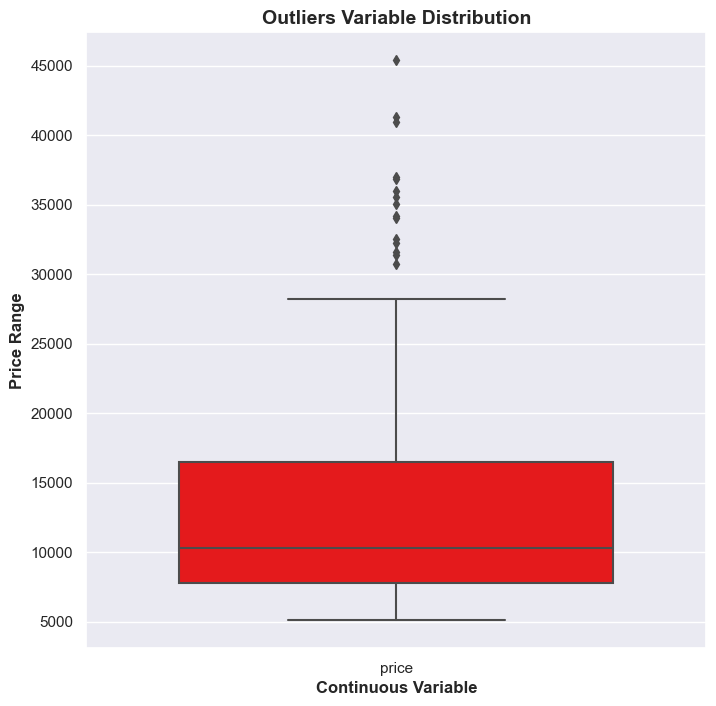

In [18]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=car_pred[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
car_pred.shape

#### Insights: 
- There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [19]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

car_pred['symboling'] = car_pred['symboling'].astype(str)

In [20]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = car_pred.select_dtypes(include=['object']).columns
num_col = car_pred.select_dtypes(exclude=['object']).columns
car_cat = car_pred[cat_col]
car_num = car_pred[num_col]

### Exploratory Data Analysis (EDA)

### 1. Visualizing our Target Feature.

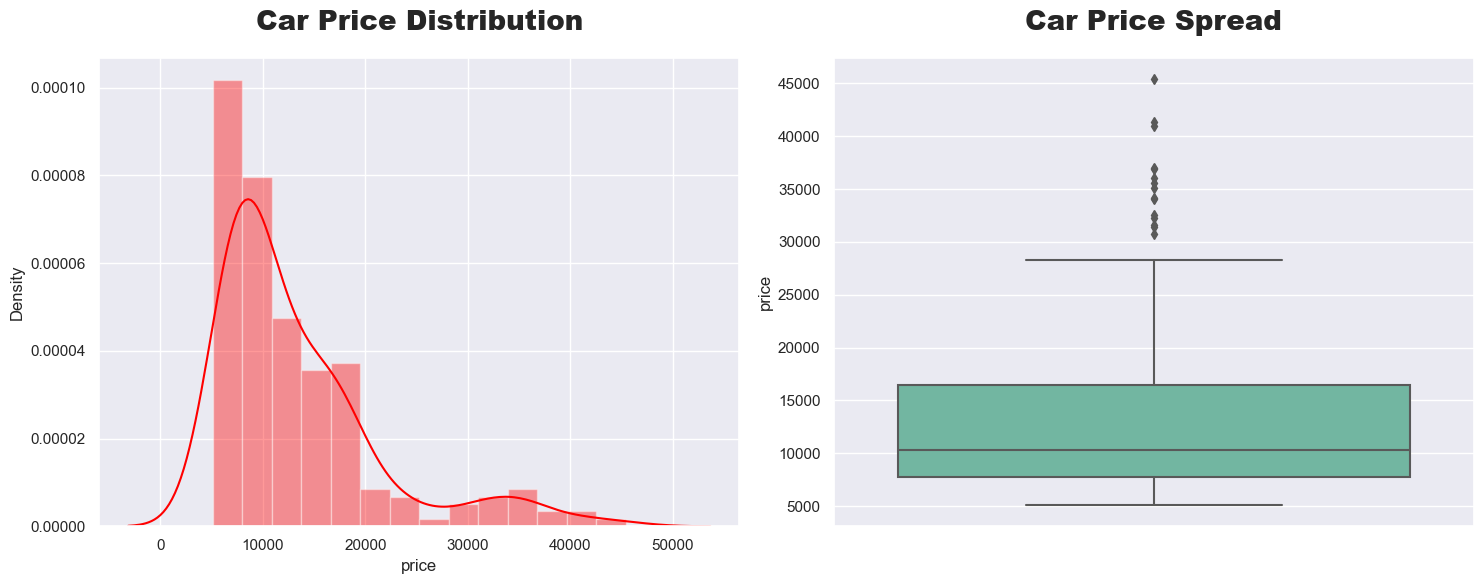

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(car_pred["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=car_pred["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [22]:
car_pred["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min       mean     median        max       std   skew
price 5118.0000 13276.7106 10295.0000 45400.0000 7988.8523 1.7777

**Insights**
1. We can clearly observe that our **Car Price Feature** is Right Skewed.
2. We can clearly observe that there is a significant difference between **mean & median value**.
3. We can also make an insight that most of the **car's price is below 14000**.
4. We can also that the **skewness of the car price is above 1.5** which means that the data points are **highly spread.**

---

### 2. Visualizing Total No. of cars sold by different company.

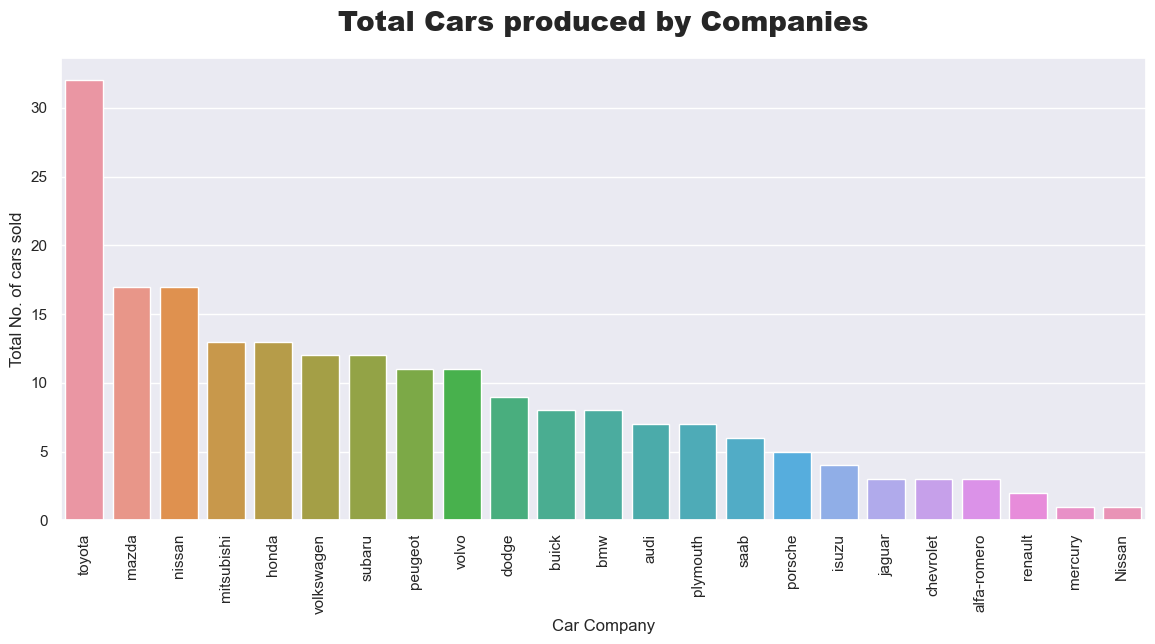

In [23]:
plt.figure(figsize=(14,6))
counts = car_pred["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [24]:
car_pred[car_pred["CompanyName"]=="mercury"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
75  76      1         mercury     gas      turbo      two        hatchback   

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
75  rwd        front         102.7000   178.4000   68.0000   54.8000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
75  2910        ohc        four           140         mpfi      3.7800       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
75 3.1200  8.0000             175         5000     19       24           

        price  
75 16503.0000

In [25]:
car_pred[car_pred["CompanyName"]=="Nissan"]

car_ID symboling CompanyName fueltype aspiration doornumber carbody  \
89  90      1         Nissan      gas      std        two        sedan    

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
89  fwd        front         94.5000    165.3000   63.8000   54.5000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
89  1889        ohc        four           97          2bbl      3.1500       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
89 3.2900  9.4000             69          5200     31       37           

       price  
89 5499.0000

In [26]:
car_pred[car_pred["CompanyName"]=="renault"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
130  131     0         renault     gas      std        four       wagon       
131  132     2         renault     gas      std        two        hatchback   

    drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
130  fwd        front         96.1000    181.5000   66.5000   55.2000      
131  fwd        front         96.1000    176.8000   66.6000   50.5000      

     curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
130  2579        ohc        four           132         mpfi      3.4600       
131  2460        ohc        four           132         mpfi      3.4600       

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
130 3.9000  8.7000             90          5100     23       31           
131 3.9000  8.7000             90          5100     23       31           

        price  
130 9295.0000  
131 9895.0000

**Insights**
1. **Toyota** company has sold the highest number of cars. 
2. So we can say that **Toyota** is kind of customers most favoured company.
3. **Nisaan** ,**Mercury** or **renault** are having very low data-points. So we can't make any inference of least sold car companies.

### 3. Visualizing Car Company w.r.t Price.

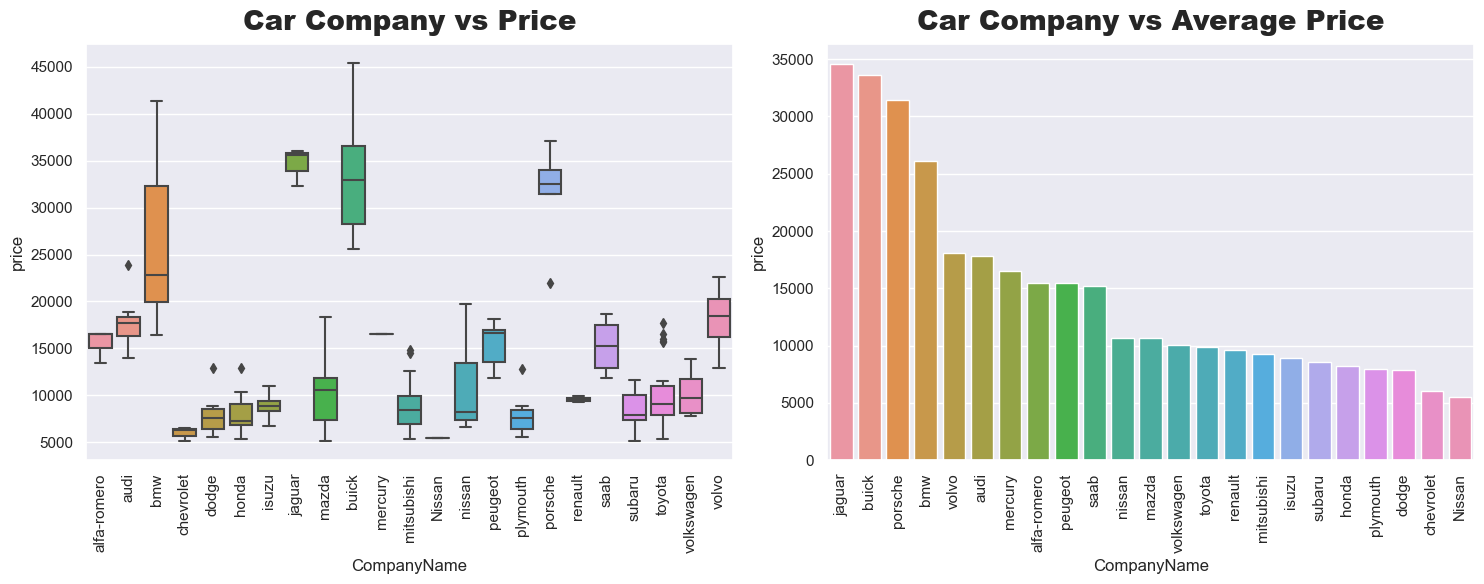

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=car_pred)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(car_pred.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

In [28]:
car_pred[car_pred["CompanyName"]=="mercury"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
75  76      1         mercury     gas      turbo      two        hatchback   

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
75  rwd        front         102.7000   178.4000   68.0000   54.8000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
75  2910        ohc        four           140         mpfi      3.7800       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
75 3.1200  8.0000             175         5000     19       24           

        price  
75 16503.0000

In [29]:
car_pred[car_pred["CompanyName"]=="Nissan"]

car_ID symboling CompanyName fueltype aspiration doornumber carbody  \
89  90      1         Nissan      gas      std        two        sedan    

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
89  fwd        front         94.5000    165.3000   63.8000   54.5000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
89  1889        ohc        four           97          2bbl      3.1500       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
89 3.2900  9.4000             69          5200     31       37           

       price  
89 5499.0000

In [30]:
car_pred[car_pred["CompanyName"]=="renault"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
130  131     0         renault     gas      std        four       wagon       
131  132     2         renault     gas      std        two        hatchback   

    drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
130  fwd        front         96.1000    181.5000   66.5000   55.2000      
131  fwd        front         96.1000    176.8000   66.6000   50.5000      

     curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
130  2579        ohc        four           132         mpfi      3.4600       
131  2460        ohc        four           132         mpfi      3.4600       

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
130 3.9000  8.7000             90          5100     23       31           
131 3.9000  8.7000             90          5100     23       31           

        price  
130 9295.0000  
131 9895.0000

**Insights**
1. **Jaguar** & **buick** seems to have the highest price range cars.
2. Car companies like **Nisaan**,**Renault** & **Mercury** are having only one to two datapoints.
3. So we can't make any inference related to lowest price range car companies.

**Note**
* Since there are too many categories in car compnay feature. So we can derive a new feature **Company Price Range** which will show the price range as **Low Range, Medium Range, High Range**.

---

### 4. Visualizing Car Fuel Type Feature.

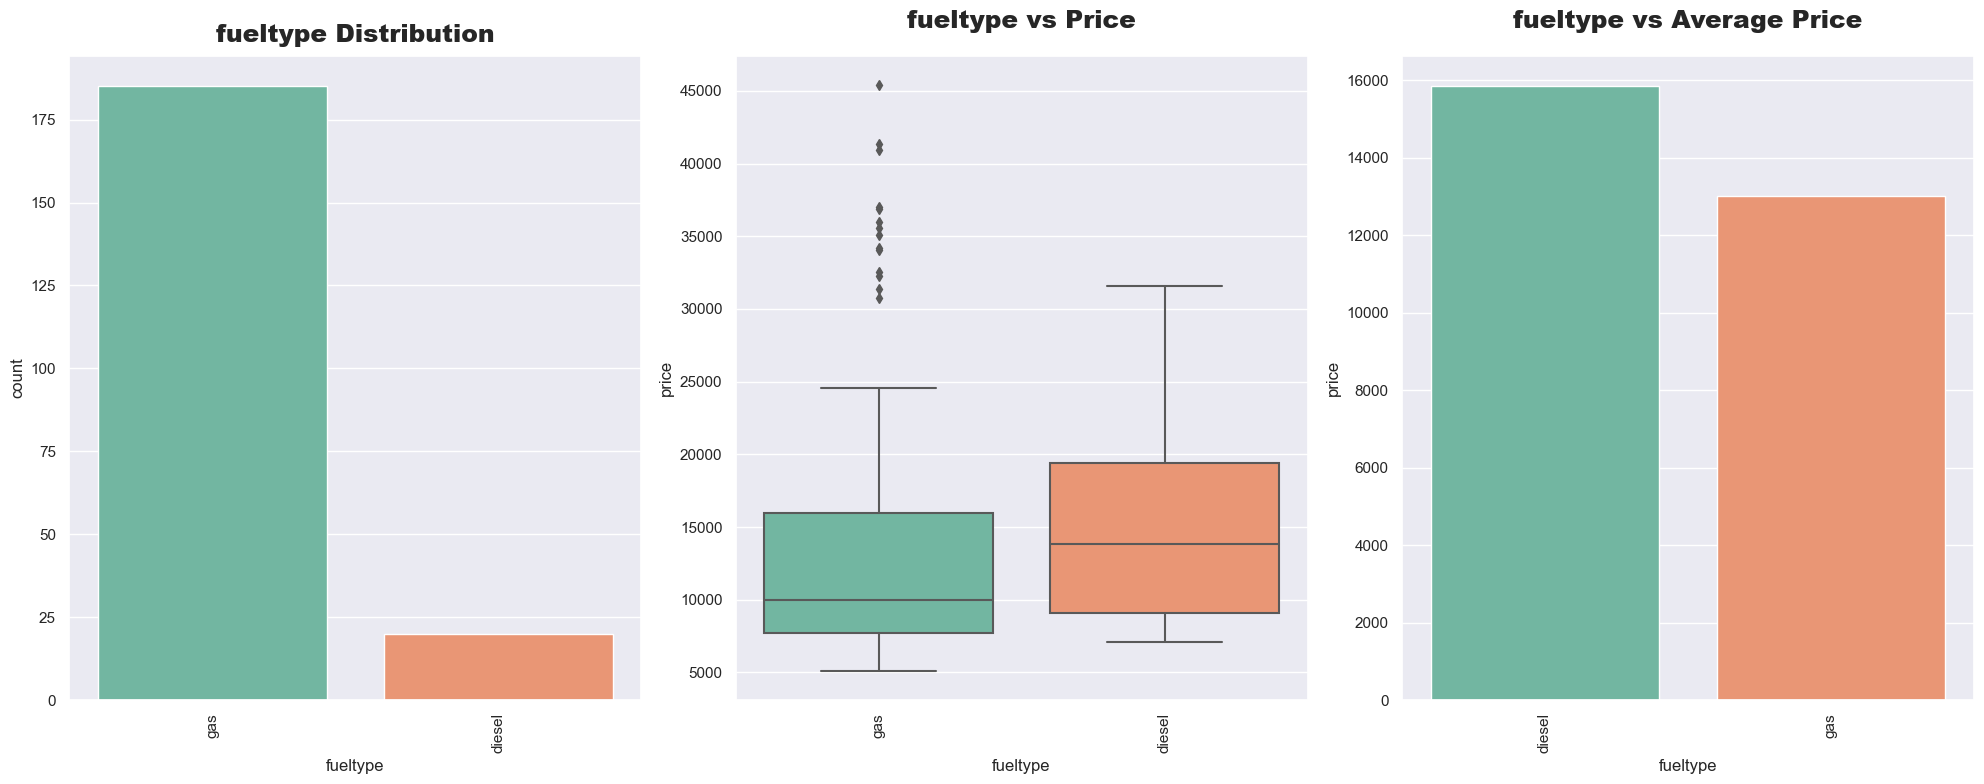

In [31]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=car_pred,palette="Set2",order=car_pred[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=car_pred,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(car_pred.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")

**Insights**
1. We can clearly make an inisght that **Cars having gas fuel system** is mostly sold.
2. From the second plot we can make an insight that **Gas Fuel Sysytem cars** are availabe within every **price range**.
3. **Both type of fuel cars** are having most of the cars price near to **average price** of the cars. But the **gas Fuel Type** cars are having cars with high prices also.
4. From the third plot we can make an inisght that the **Average price of gas fuel type cars are less than diesel fuel type cars**. 
5. So we can say that customers prefer those cars which consumes less price in fuels.

---

### 5. Visualizing Aspiration Feature.

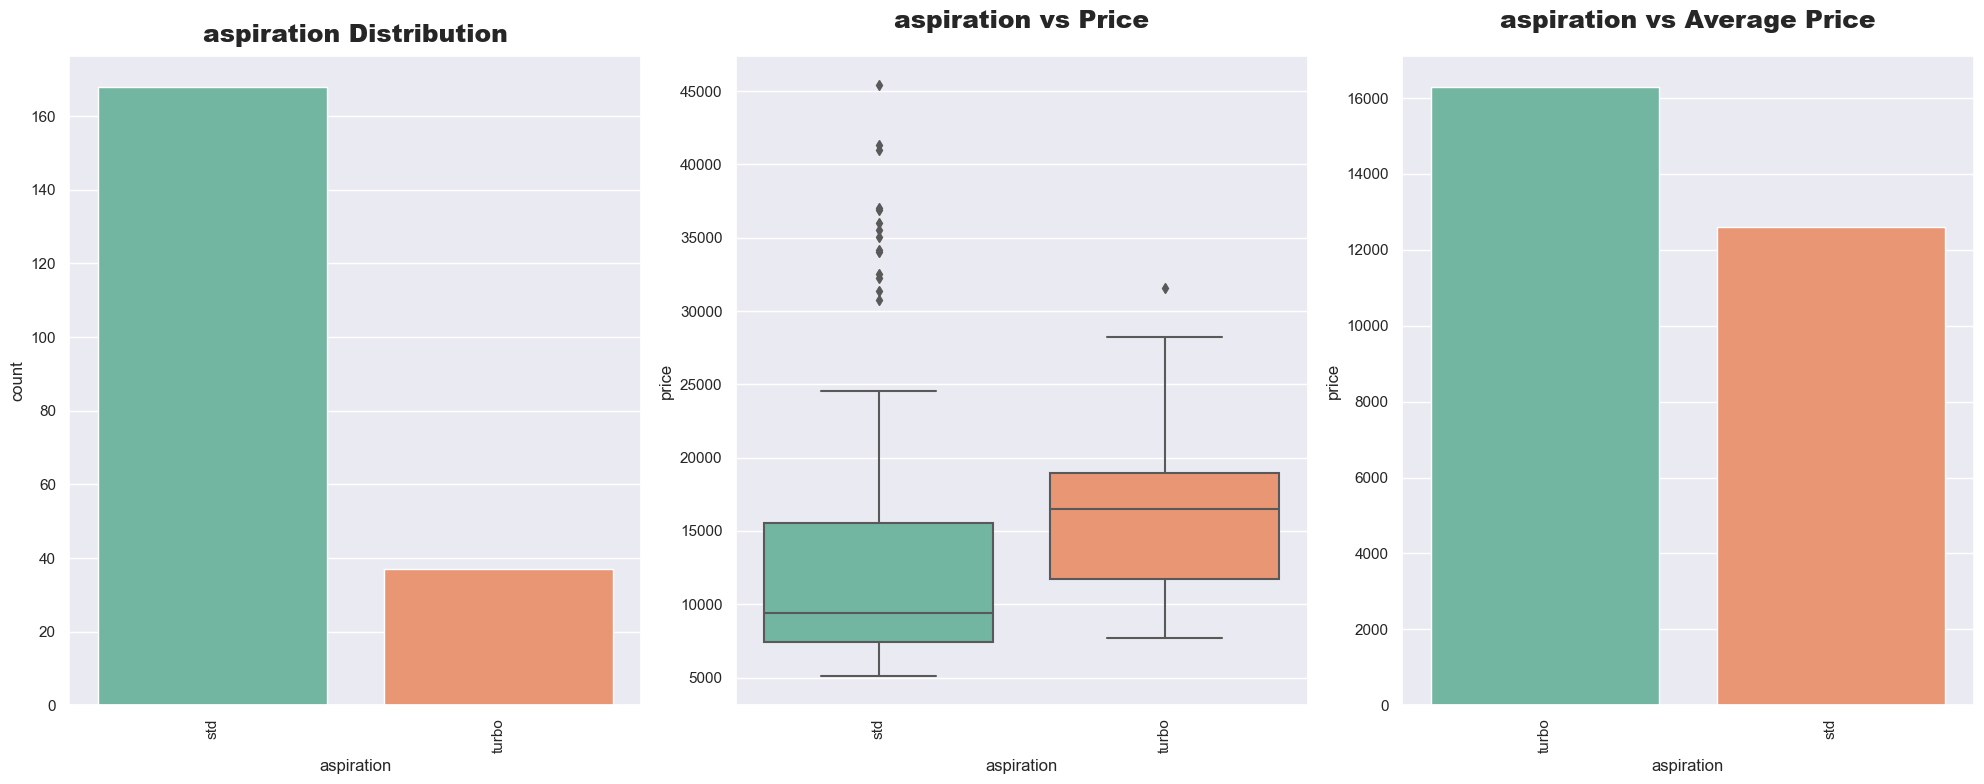

In [32]:
categorical_visualization("aspiration")

**Observation**
1. Cars having **STD** Aspiration are highly sold when compared with **Turbo** Aspiration.
2. Cars having **Turbo** Aspiration have higher price range than the **STD** Aspiration.

**Insights**
1. Outliers present in **STD** Aspiration states that some of the cars having **std** aspiration are expensive too.

---

### 6. Visualizing Door Nubmer Feature.

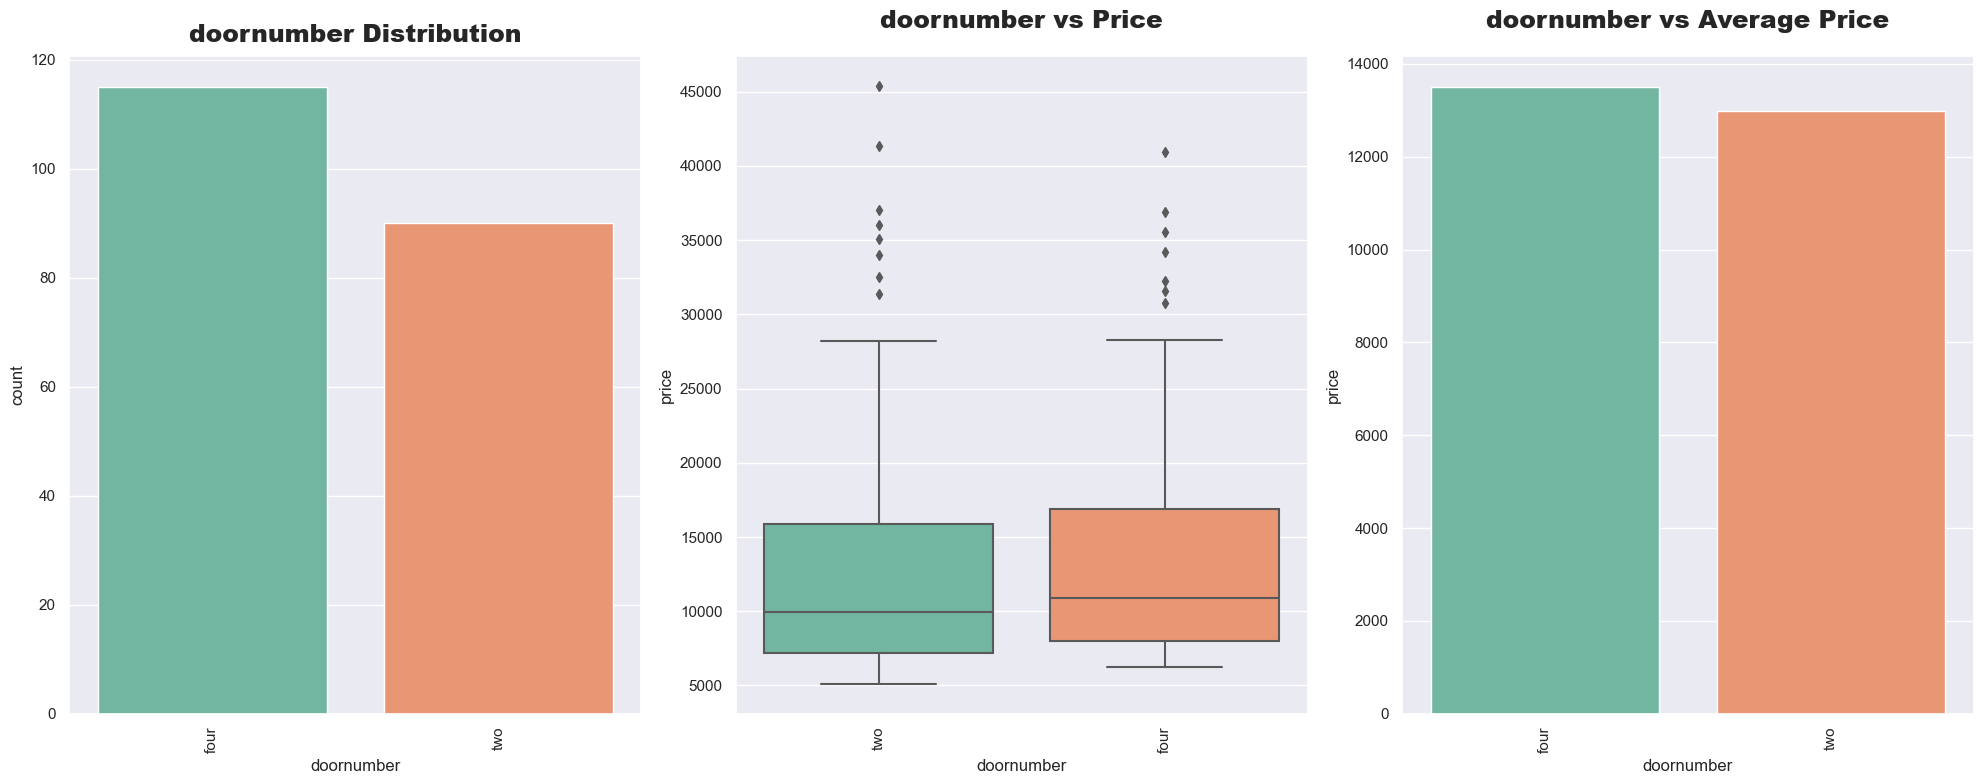

In [33]:
categorical_visualization("doornumber")

**Observation**
1. Cars having **Four Doors** are mostly sold when compared with cars having **Two Doors**.
2. Cars having **Fours Doors** are little more expensive when we compare the avergae price of cars having **two doors** or **four doors**.

**Insights**
1. Cars having **Four Doors** are mostly sold. But there's not a big difference between the sales of cars having **four doors** & **two doors.**.
2. Outliers prsesent in **two doors** cars states that some of the cars are are more expensive than the cars having **four doors**
3. Door numbers category is not affecting the price that much.

---

### 7. Visualizing Car Body Type Feature.

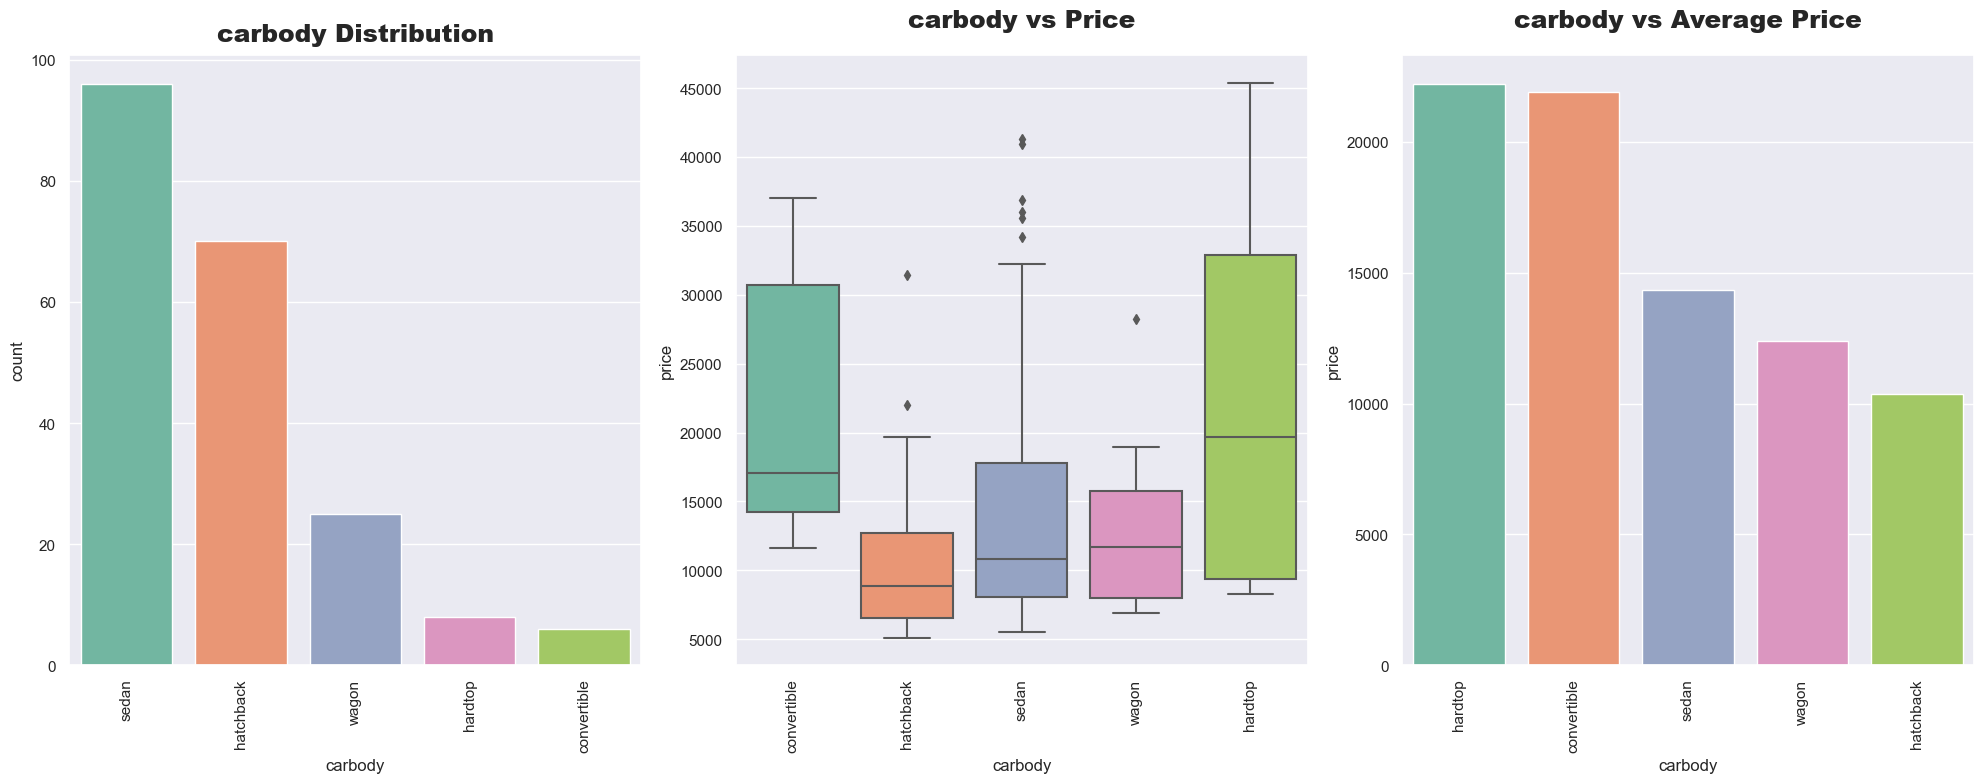

In [34]:
categorical_visualization("carbody")

**Obseravtion**
1. Cars having **sedan** body-type are mostly sold followed by **hatchback**.
2. Cars having **convertible** or **hardtop** body-type are less sold.
3. Cars having **Hardtop** body-type is the mostly expensive cars followed by **convertible**.


**Insights**
1. **Convertible** & **Hardtop** body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
2. Cars having **Sedan** body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer **medium price range cars**.

---

### 8. Visualizing Drive Wheel Feature.

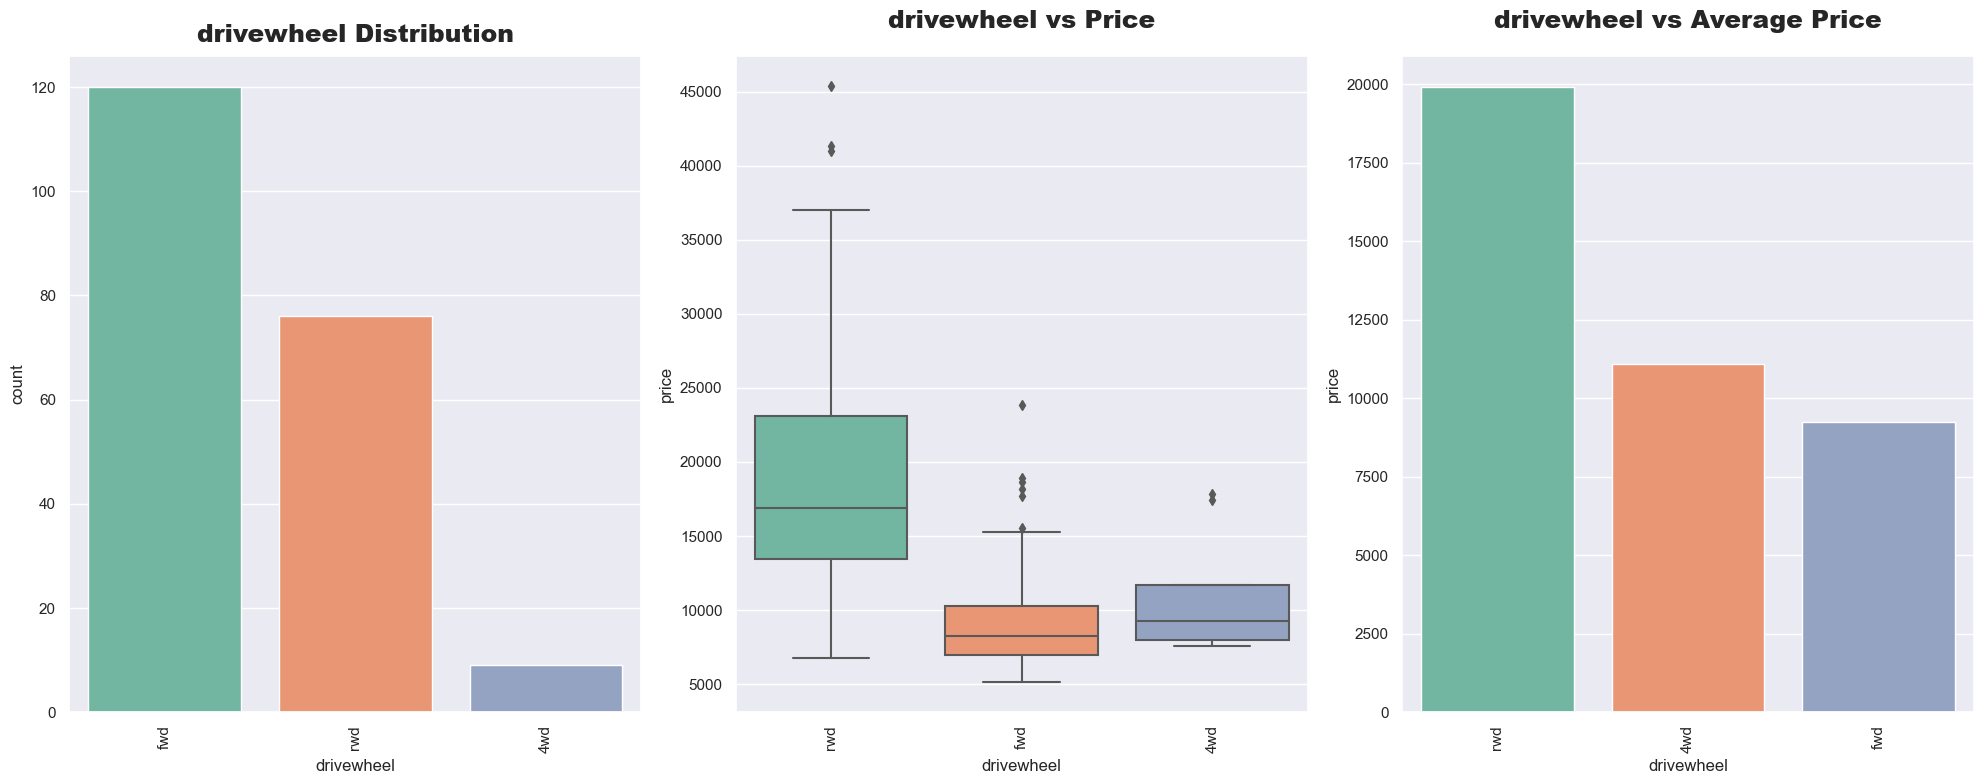

In [35]:
categorical_visualization("drivewheel")

**Observation**
1. Most of the cars which are sold are having **Front Wheel Drive (FWD)** followed by **Rear Wheel Drive (RWD)**.
2. Cars having **Rear Wheel Drive** are mostly expensive cars. But cars having **Front Wheel Drive** are the cheapest.

**Insights**
1. We can make an insight that the high rated cars must be using **Rear Wheel Drive**.
2. Cars with low prices must be using **Forward Wheel Drive**

---

### 9. Visualizing Engine Location Feature.

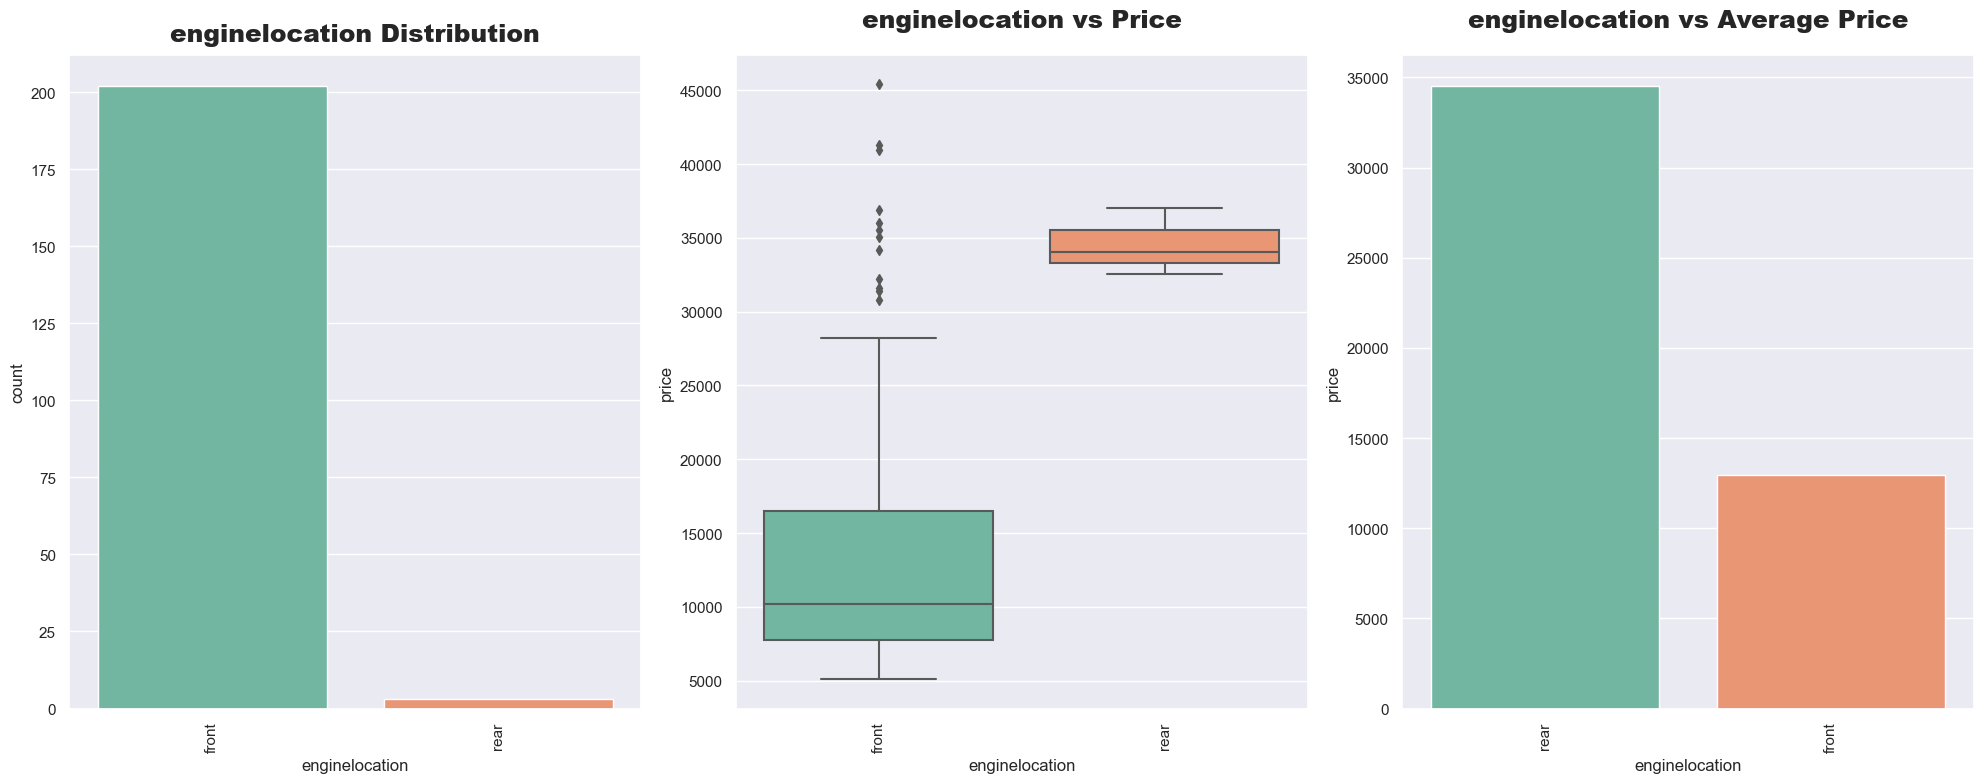

In [36]:
categorical_visualization("enginelocation")

In [37]:
car_pred[car_pred["enginelocation"]=="rear"]

car_ID symboling CompanyName fueltype aspiration doornumber      carbody  \
126  127     3         porsche     gas      std        two        hardtop       
127  128     3         porsche     gas      std        two        hardtop       
128  129     3         porsche     gas      std        two        convertible   

    drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
126  rwd        rear          89.5000    168.9000   65.0000   51.6000      
127  rwd        rear          89.5000    168.9000   65.0000   51.6000      
128  rwd        rear          89.5000    168.9000   65.0000   51.6000      

     curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
126  2756        ohcf       six            194         mpfi      3.7400       
127  2756        ohcf       six            194         mpfi      3.7400       
128  2800        ohcf       six            194         mpfi      3.7400       

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
126 2.9000  9.5000             207         5900     17       25           
127 2.9000  9.5000             207         5900     17       25           
128 2.9000  9.5000             207         5900     17       25           

         price  
126 32528.0000  
127 34028.0000  
128 37028.0000

**Observation**
1. Most of the cars are having engine location in **front**.

**Insights**
1. Note there are **only 3 data-points for the rear** category. 
2. So we can't make any inference of car price when compared with engine location.
3. If we want we can drop this feature before training as it may lead to **overfitting.**

---

### 10. Visualizing Engine Type Feature.

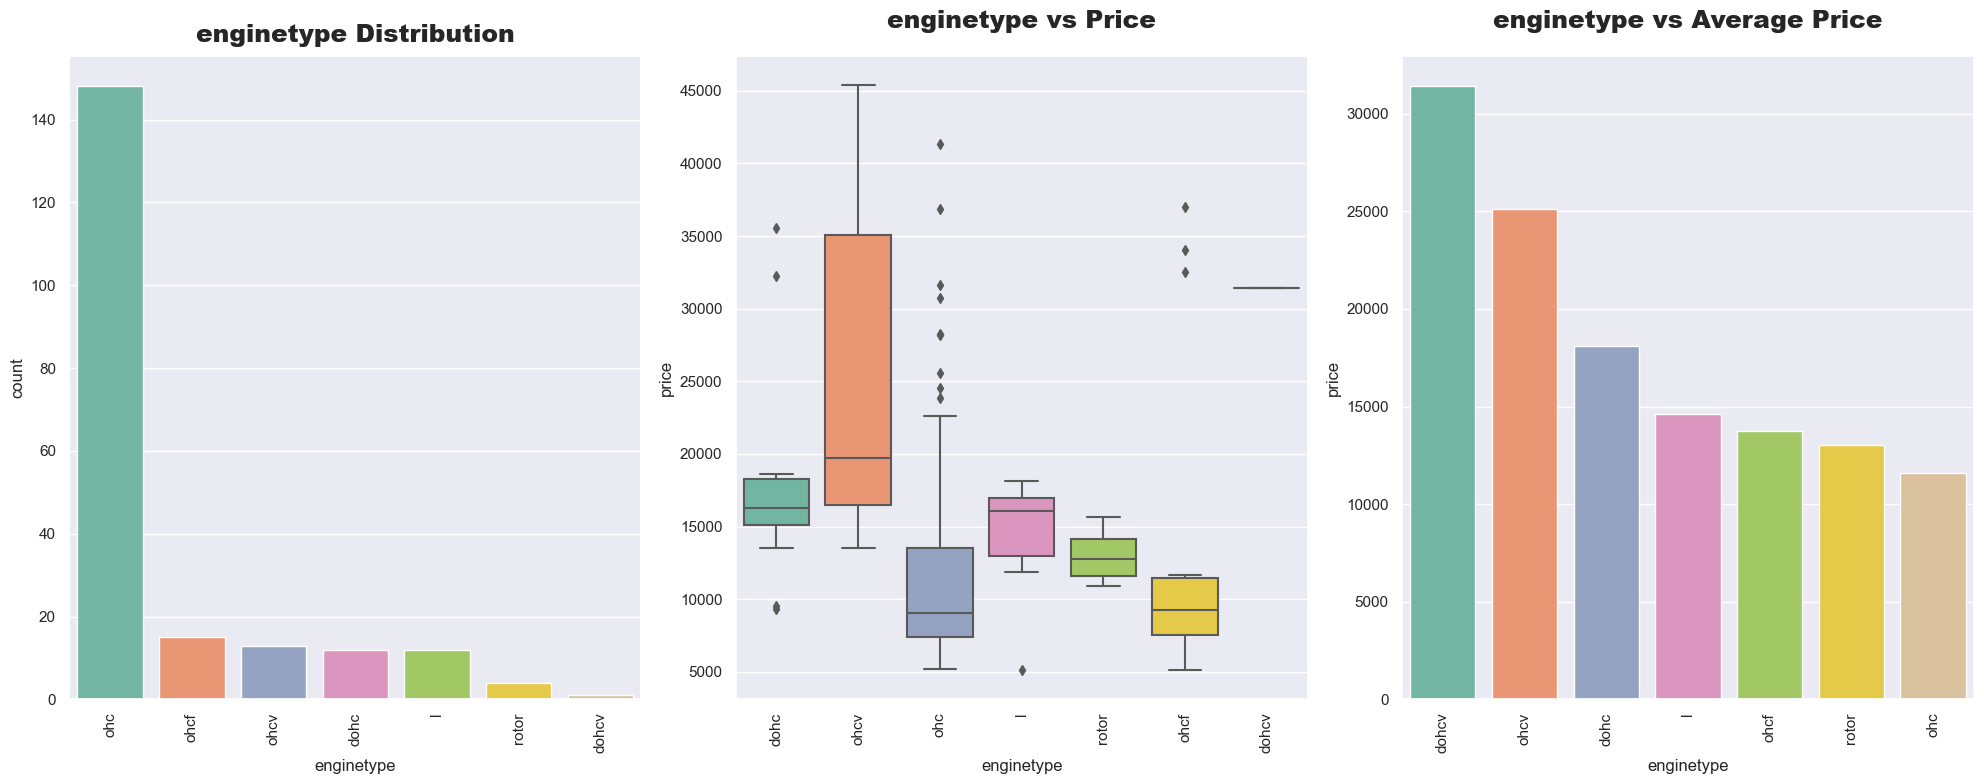

In [38]:
categorical_visualization("enginetype")

In [39]:
car_pred[car_pred["enginetype"]=="dohcv"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
129  130     1         porsche     gas      std        two        hatchback   

    drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
129  rwd        front         98.4000    175.7000   72.3000   50.5000      

     curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
129  3366        dohcv      eight          203         mpfi      3.9400       

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
129 3.1100  10.0000            288         5750     17       28           

         price  
129 31400.5000

In [40]:
car_pred[car_pred["enginetype"]=="rotor"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
55  56      3         mazda       gas      std        two        hatchback   
56  57      3         mazda       gas      std        two        hatchback   
57  58      3         mazda       gas      std        two        hatchback   
58  59      3         mazda       gas      std        two        hatchback   

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
55  rwd        front         95.3000    169.0000   65.7000   49.6000      
56  rwd        front         95.3000    169.0000   65.7000   49.6000      
57  rwd        front         95.3000    169.0000   65.7000   49.6000      
58  rwd        front         95.3000    169.0000   65.7000   49.6000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
55  2380        rotor      two            70          4bbl      3.3300       
56  2380        rotor      two            70          4bbl      3.3300       
57  2385        rotor      two            70          4bbl      3.3300       
58  2500        rotor      two            80          mpfi      3.3300       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
55 3.2550  9.4000             101         6000     17       23           
56 3.2550  9.4000             101         6000     17       23           
57 3.2550  9.4000             101         6000     17       23           
58 3.2550  9.4000             135         6000     16       23           

        price  
55 10945.0000  
56 11845.0000  
57 13645.0000  
58 15645.0000

**Insights**
1. Cars having **Overhead Camshaft (OHC)** engines are mostly sold.
2. Only one car has been sold having engine type **dohcv**.
3. There are very few data-points of engine type **dohcv** & **rotor**. So we can say that cars having **ohcv** engine types are mostly expensive.
4. Cars hvaing **Overhead Camshaft (OHC)** engines are least expensive cars.

---

### 11. Visualizing Cyclinder Number Feature.

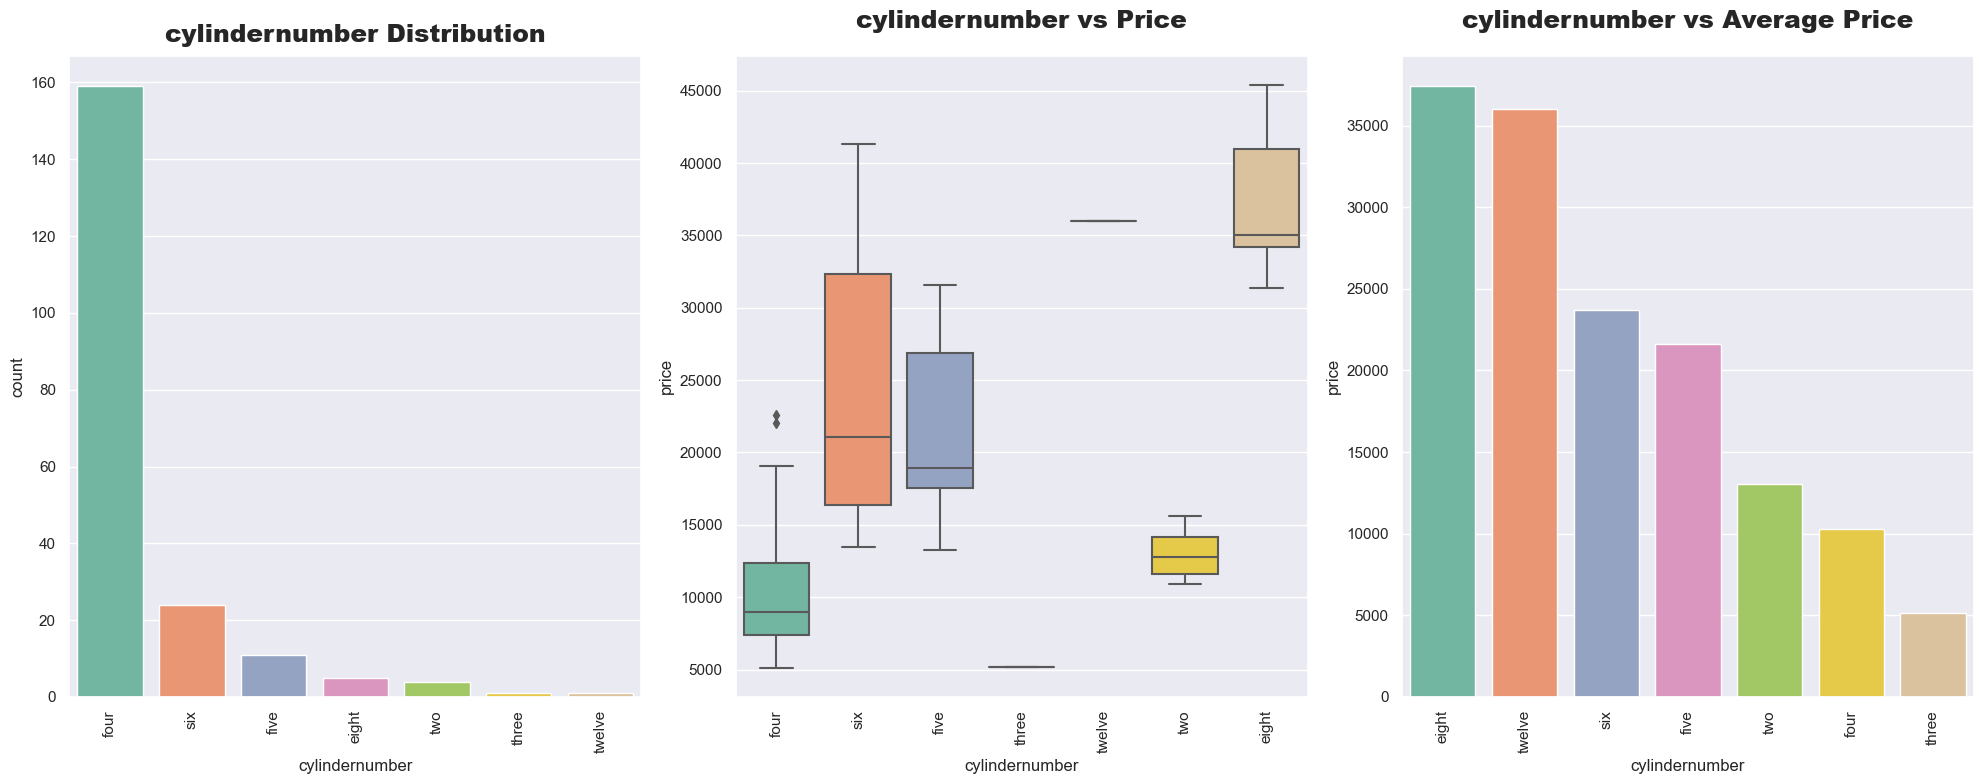

In [41]:
categorical_visualization("cylindernumber")

In [42]:
car_pred[car_pred["cylindernumber"]=="three"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
18  19      2         chevrolet   gas      std        two        hatchback   

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
18  fwd        front         88.4000    141.1000   60.3000   53.2000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
18  1488        l          three          61          2bbl      2.9100       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
18 3.0300  9.5000             48          5100     47       53           

       price  
18 5151.0000

In [43]:
car_pred
[car_pred["cylindernumber"]=="twelve"]

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 200    False
 201    False
 202    False
 203    False
 204    False
 Name: cylindernumber, Length: 205, dtype: bool]

**Insights**
1. Most of the cars are having **Four** cyclinders followed by cars having **six** cyclinders.
2. There are only one data-point each for car having **Three** & **Twelve** data-points.
3. Cars having **eight** cyclinders are most expensive cars followed by **six** cyclinders.

---

### 12. Visualizing Fuel System Feature.

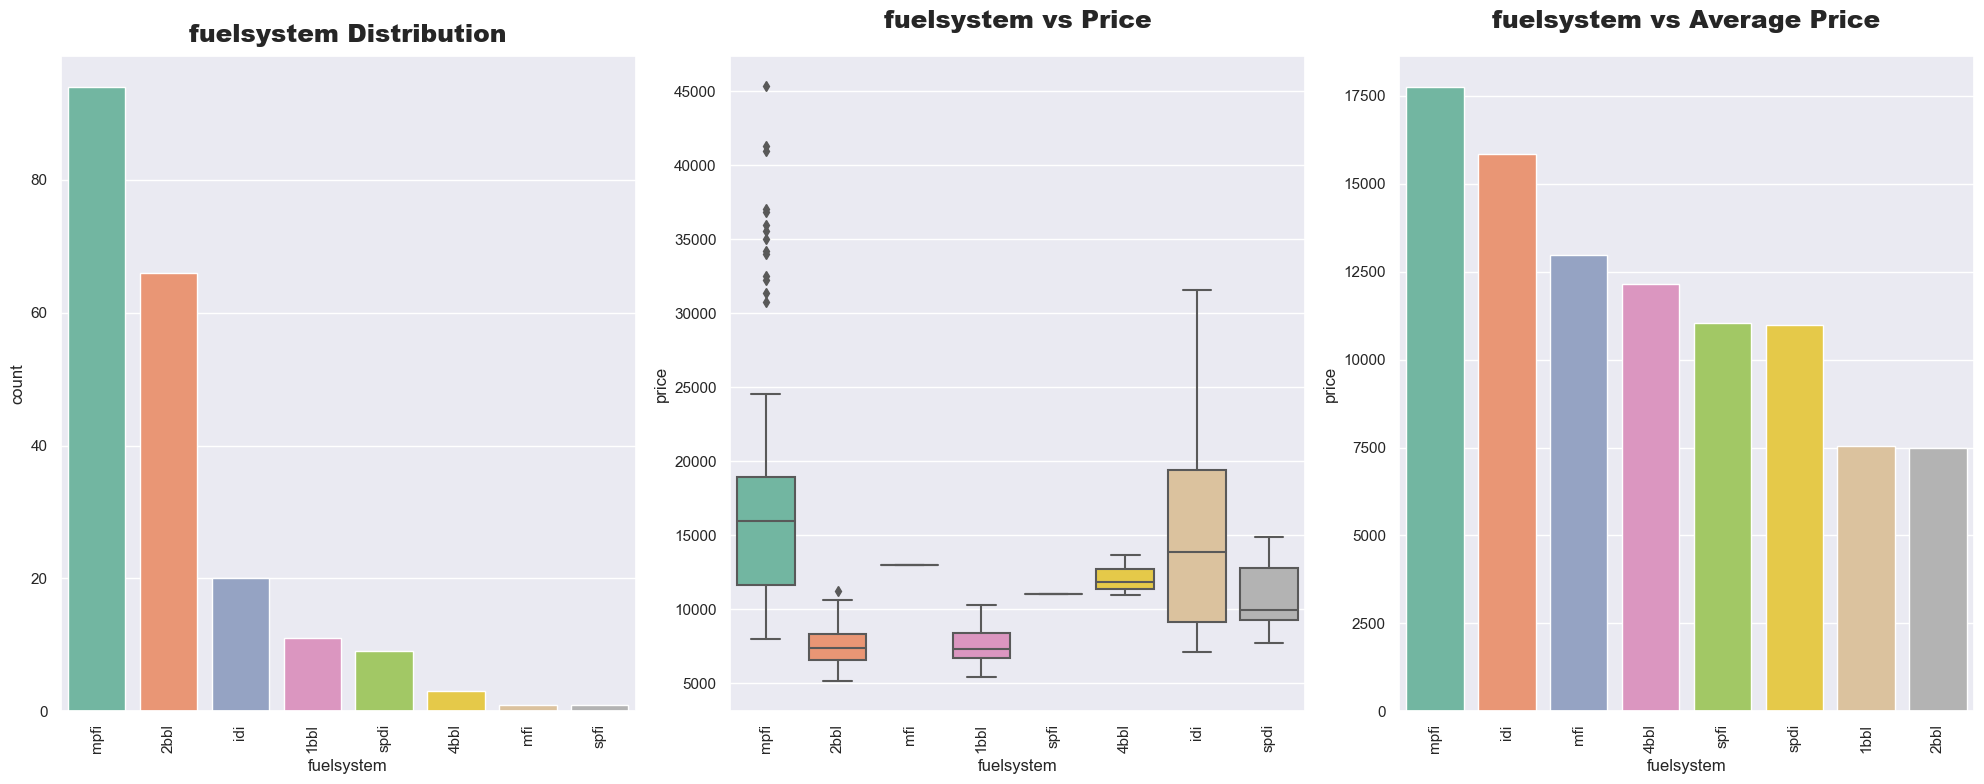

In [44]:
categorical_visualization("fuelsystem")

In [45]:
car_pred[car_pred["fuelsystem"]=="mfi"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
29  30      3         dodge       gas      turbo      two        hatchback   

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
29  fwd        front         95.9000    173.2000   66.3000   50.2000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
29  2811        ohc        four           156         mfi       3.6000       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
29 3.9000  7.0000             145         5000     19       24           

        price  
29 12964.0000

In [46]:
car_pred[car_pred["fuelsystem"]=="spfi"]

car_ID symboling CompanyName fueltype aspiration doornumber    carbody  \
46  47      2         isuzu       gas      std        two        hatchback   

   drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
46  rwd        front         96.0000    172.6000   65.2000   51.4000      

    curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
46  2734        ohc        four           119         spfi      3.4300       

    stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
46 3.2300  9.2000             90          5000     24       29           

        price  
46 11048.0000

**Insight**
1. Most of the cars are having **mpfi** & **2bbl** fuelsystems.
2. Cars having **mpfi** fuel system are the expensive cars followed by **idi** fuel system cars.
3. There are only one data-point for each **mfi** and **spfi** fuelsystem cars. So we can make any further inference.

---

### 13. Visualizing Symboling Feature.

1. The **symboling** represents the degree to which the car is riskier than its price suggests. 
2. It **ranges from -3 to +3**, with higher negative values indicating higher risk and higher positive values indicating lower risk.
3. In other words, a car with a **symboling of -3** is considered **riskier** than a car with a symboling of +3, and is likely to have a **lower price** as a result.

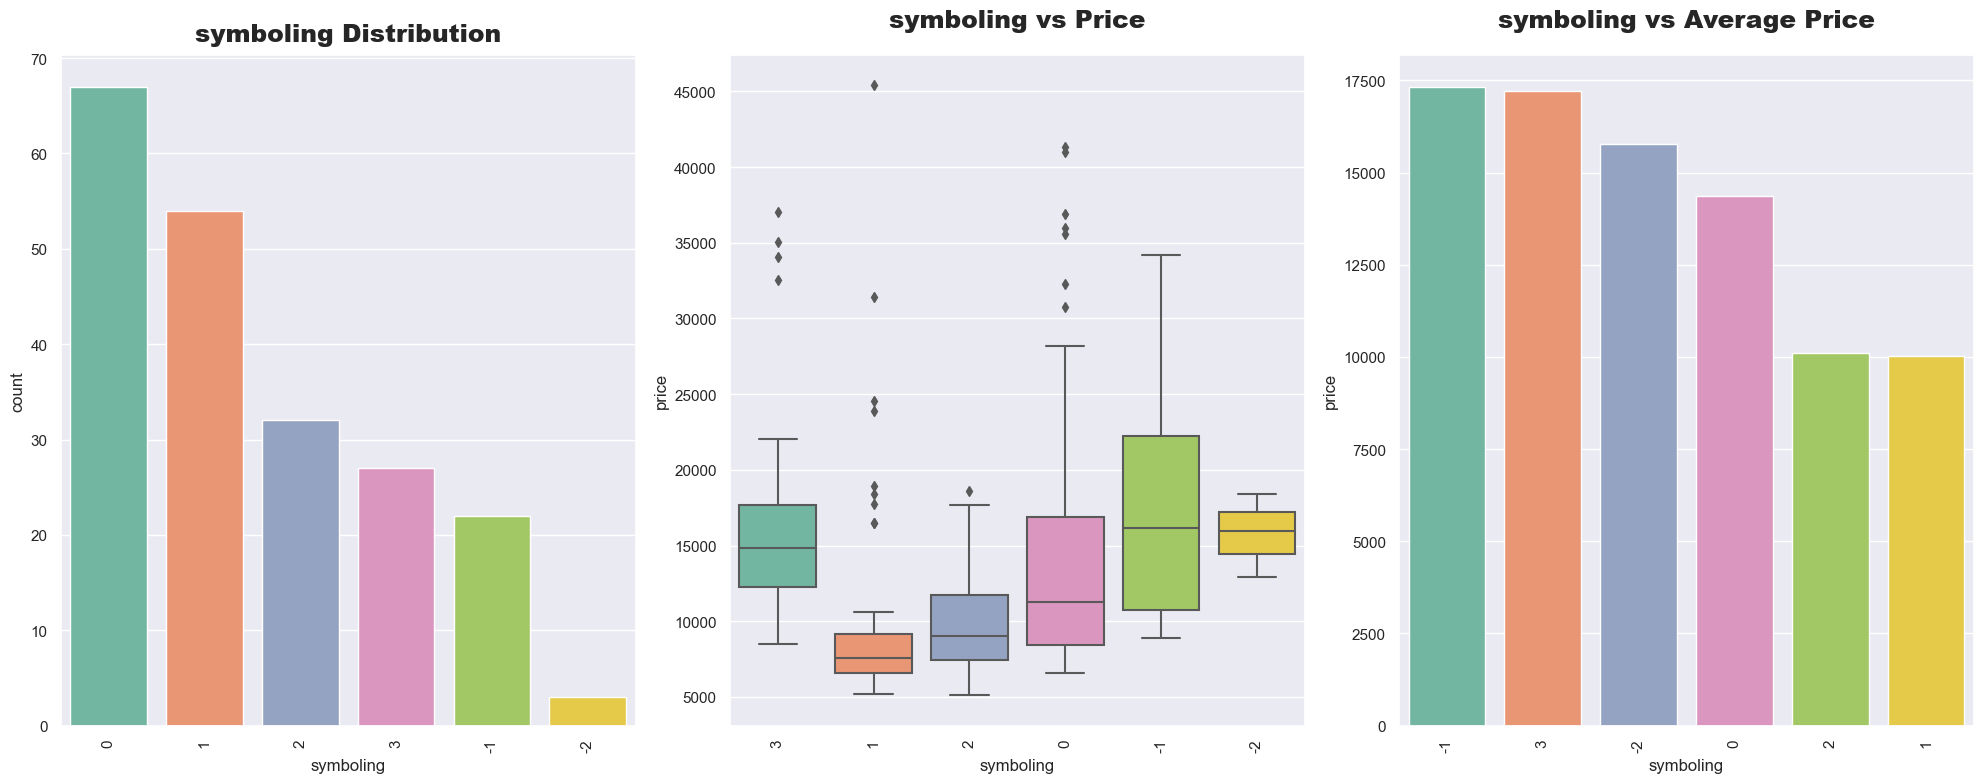

In [47]:
categorical_visualization("symboling")

**Insights**
1. We can clearly observe cars having symboling **0** or **1** are motly preferred.
2. We can aslo observe that symboling **-1, 0, 3** are expensive.

---

### 14. Visualizing "CarLength", "CarWidth","Carheight" Features w.r.t "Price".

In [48]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=car_pred,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

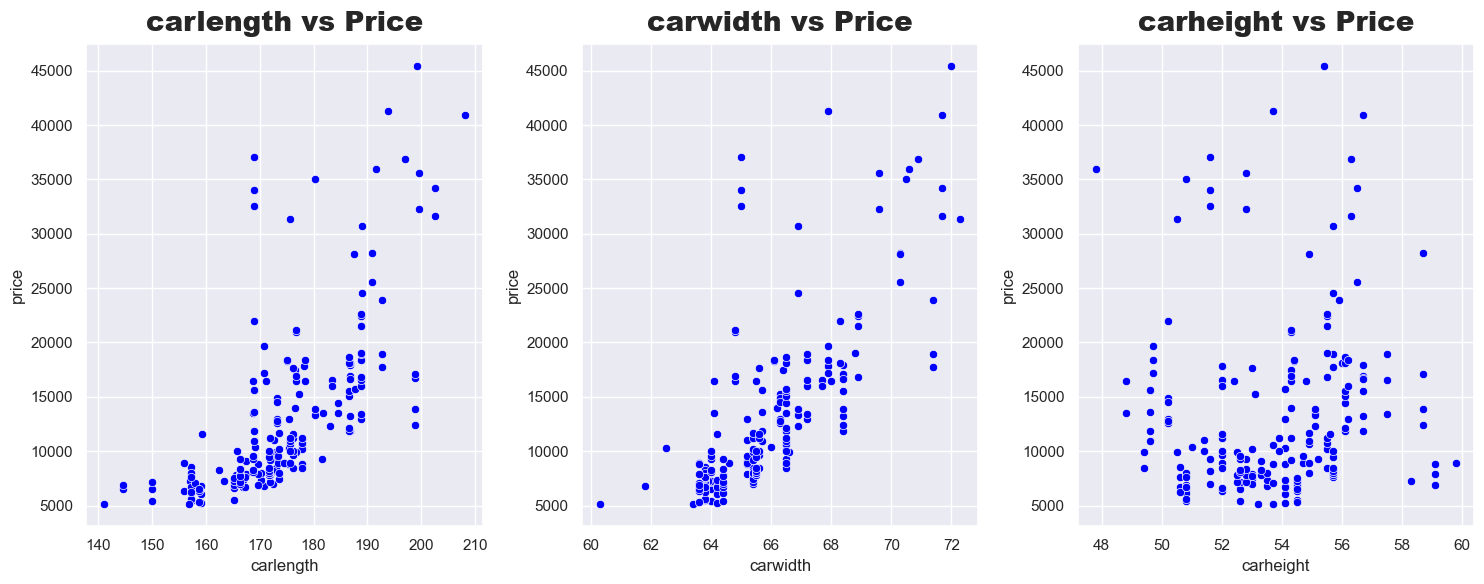

In [49]:
scatter_plot(["carlength","carwidth","carheight"])

**Insights**
1. We can clearly observe that **carlength** & **carwidth** features are highly correlated with the **price** feature.
2. So we can make an insight that **with increment in length & width** of the car there is an **increment in price too**.
3. From **carlength vs price** we can't make any inference as the data-points are too scattered.
4. Since **CarHeight** is not affecting **Price** We can drop this feature.

---

### 15. Visualizing "EngineSize","Boreratio" & "Stroke" Features

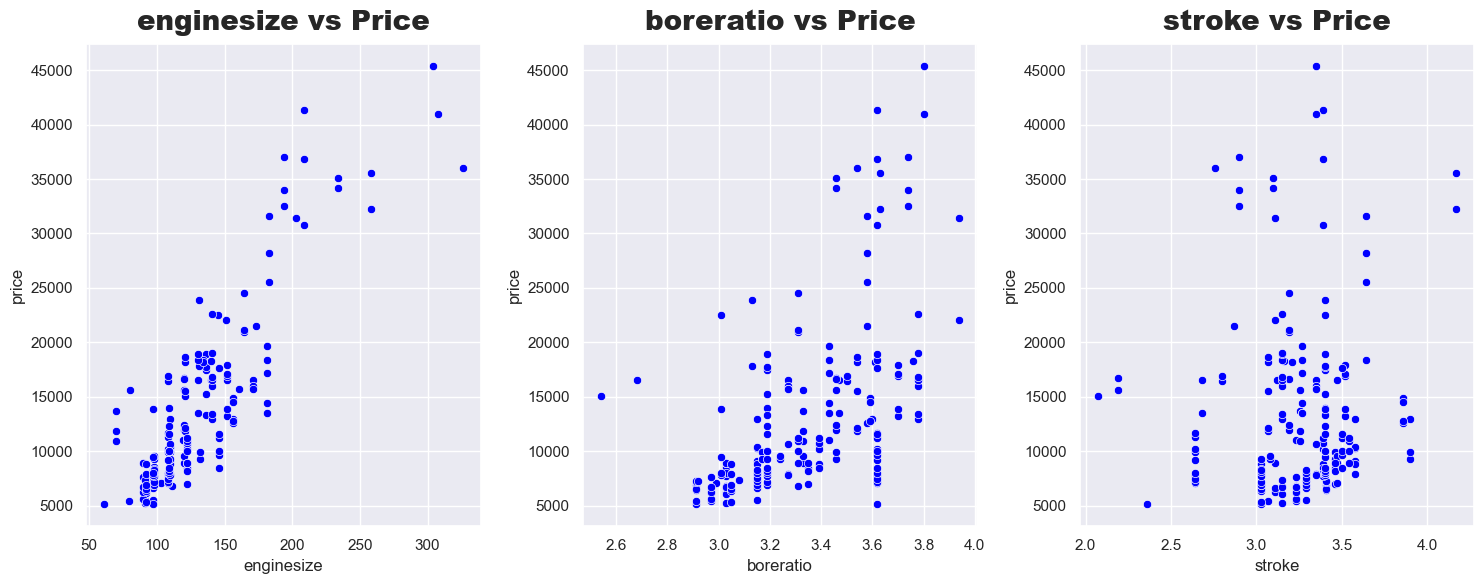

In [50]:
scatter_plot(["enginesize","boreratio","stroke"])

**Insights**
1. We can clearly observe that **Enginesize** is highly correlated with **price** feature. So we can say with the increment in **enginesize** the **price** of the cars increases.
2. From **Boreratio vs Price** we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in **boreratio** the **price** of cars increases.
3. From **Stroke vs Price** we can't make any inference as the data-points are too scattered.
4. Since **Stroke** is not affecting **Price** that much. We can drop this feature.

---

### 16. Visualizing "Compreessionratio","Horesepower" & "Peakrpm" Features.

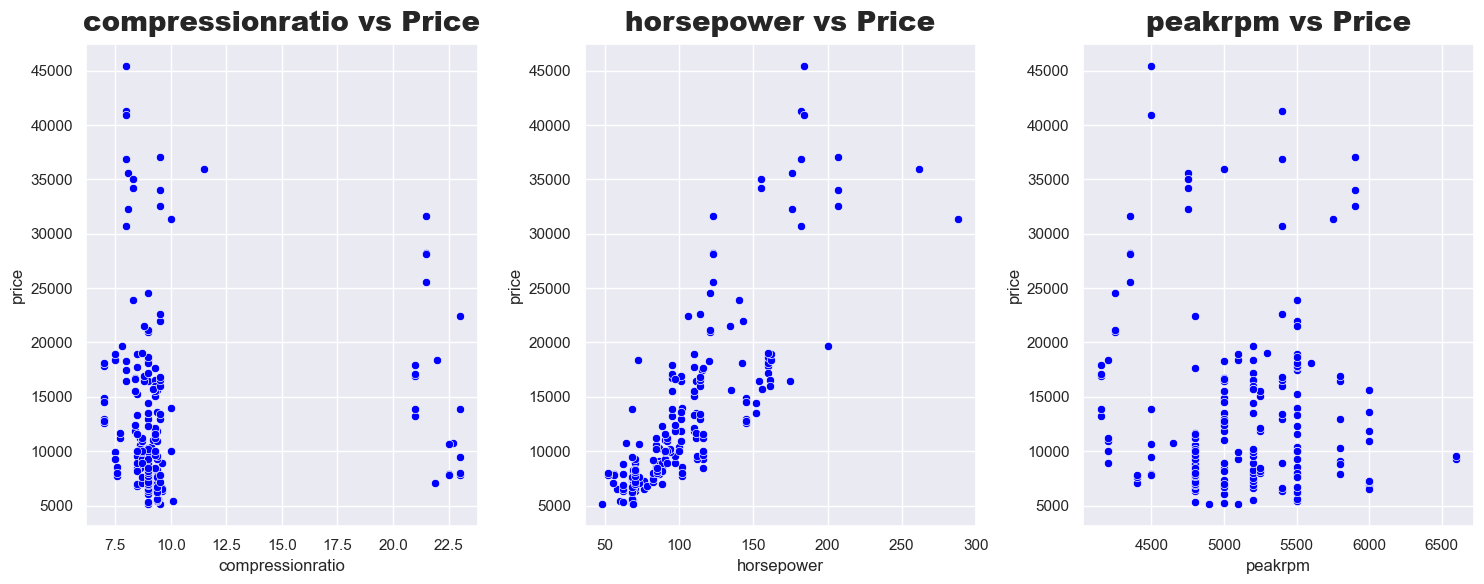

In [51]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

**Insights**
1. We can clearly observe that **Horsepower** is highly correlated with **Price**. So we can say with the increment in **Horsepower** the **price** of cars also increases.
2. From **Compressionratio vs Price** & **Peakrpm vs Price** visuals we can't make any inference as the data-points are too scattered.
3. SInce **Compressionratio & Peakrpm** is not affecting price. So we can drop this features.

---

### 17. Visualizing "WheelBase" & "Curbweight" Features.

In [52]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=car_pred,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

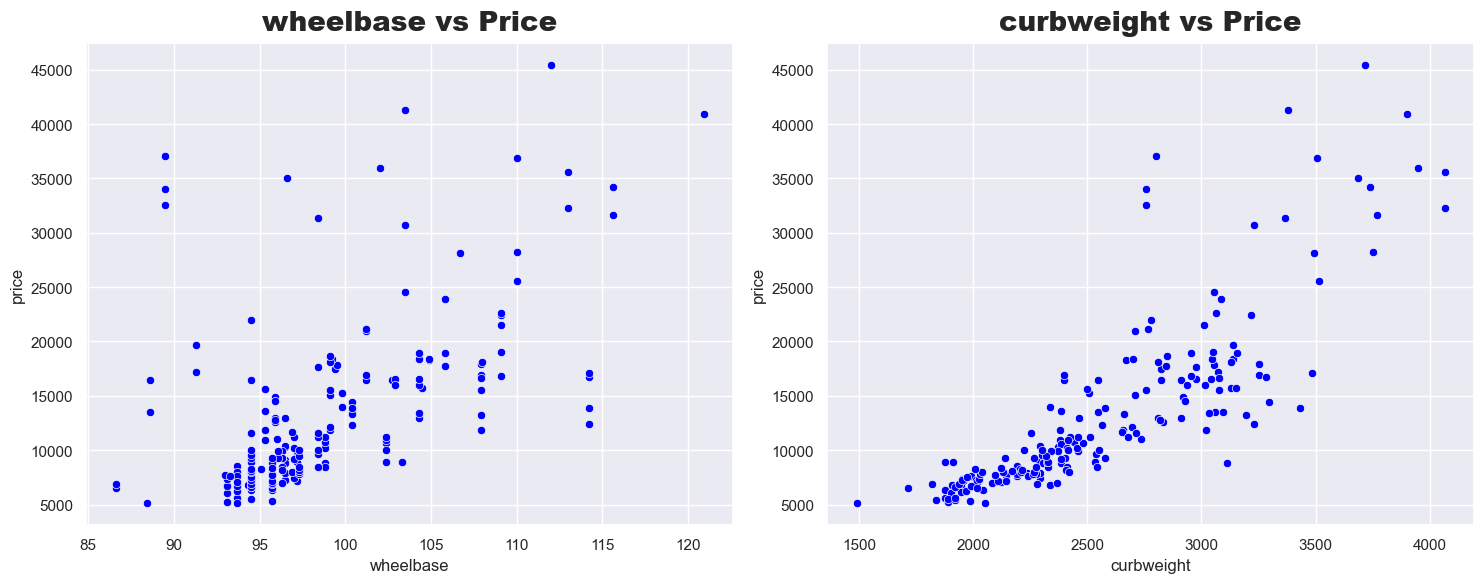

In [53]:
scatter_plot(["wheelbase","curbweight"])

**Insights**
1. We can clearly observe that **Curbweight** is highly correlated with **Price**. So we can say with the increase in **curbweight** the **price** of cars increases.
2. From **wheelbase vs price** we can say that they are not highly correlated but still there's a correlation. So with **wheel base** the **price** of the cars also increases.

### 18. Visualizing "Citympg" & "Highwaympg" Features.

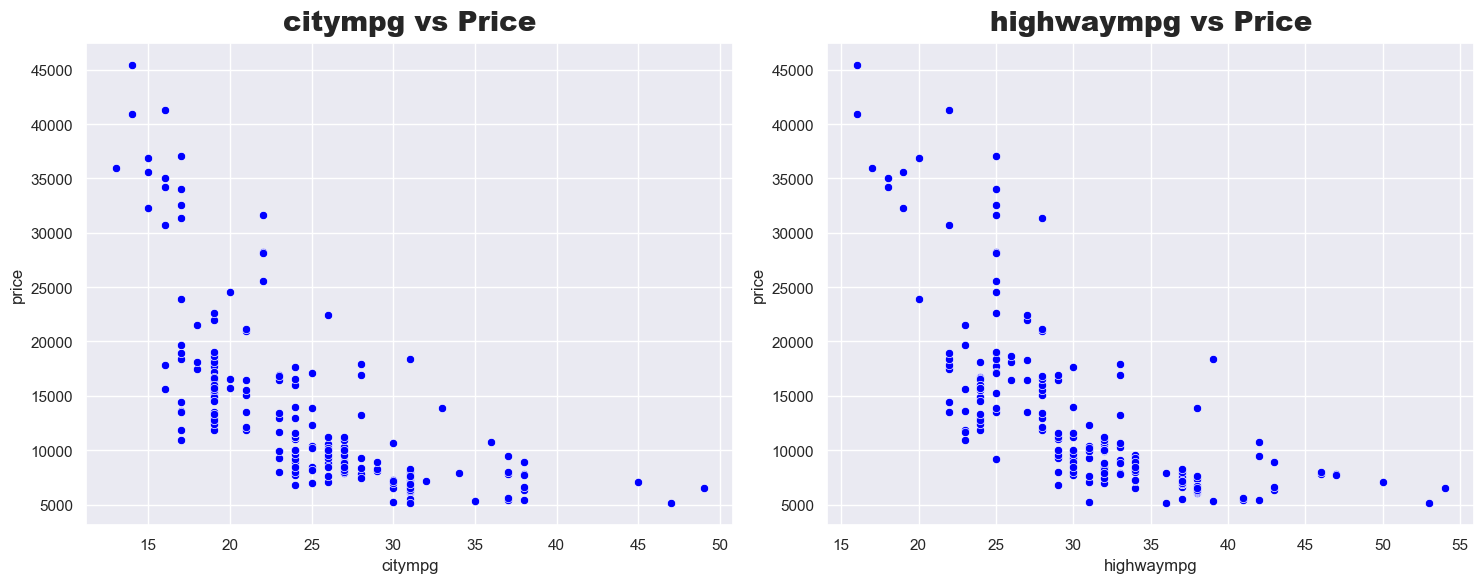

In [54]:
scatter_plot(["citympg","highwaympg"])

**Insights**
1. We can clearly observe that **Citympg** & **Highwaympg** are having **negative correlation** with the **price**.
2. So we can say that with the increment in **citympg** & **Highwaympg** the price of the cars decreases.
3. So our both **Citympg & Highwaympg** are useful features for price prediction.

***

### 18. List of all the useful Features using the EDA

**List of all the useful Categorical Features.**
1. `CompanyName`
2. `Fuel Type`
3. `Aspiration`
4. `Door Number`
5. `Car Body`
6. `Drive Wheel`
7. `Engine Type`
8. `Cyclinder Number`
9. `Fuel System`

**List of all the useful Numerical Features.**
1. `Wheelbase`
2. `Carlength`
3. `Carwidth`
4. `Curbeweight`
5. `Enginesize`
6. `Boreratio`
7. `Horsepower`
8. `citympg`
9. `Highwaympg`
10. `Price`

---

### Feature Engineering

#### Deriving New Features From "Company Name" Feature.

* As we made an insight above that we can split the car company name into different price ranges.Like **Low Range, Medium Range, High Range** cars.

In [55]:
z = round(car_pred.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName    Nissan  alfa-romero       audi        bmw      buick  \
mean        5499.0000 15498.3300   17859.1700 26118.7500 33647.0000   

CompanyName  chevrolet     dodge     honda     isuzu     jaguar      mazda  \
mean        6007.0000  7875.4400 8184.6900 8916.5000 34600.0000 10652.8800   

CompanyName    mercury  mitsubishi     nissan    peugeot  plymouth    porsche  \
mean        16503.0000 9239.7700   10704.8800 15489.0900 7963.4300 31400.5000   

CompanyName   renault       saab    subaru    toyota  volkswagen      volvo  
mean        9595.0000 15223.3300 8541.2500 9885.8100 10077.5000  18063.1800

**Note**
* In above output we fetched the **avergae price of each individual car companies**
* Now we have to add this average values a new column in our datset.

In [56]:
car_pred = car_pred.merge(z.T,how="left",on="CompanyName")

In [57]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_pred['CarsRange'] = pd.cut(car_pred['mean'],bins,right=False,labels=cars_bin)
car_pred.head()

car_ID symboling  CompanyName fueltype aspiration doornumber      carbody  \
0  1       3         alfa-romero  gas      std        two        convertible   
1  2       3         alfa-romero  gas      std        two        convertible   
2  3       1         alfa-romero  gas      std        two        hatchback     
3  4       2         audi         gas      std        four       sedan         
4  5       2         audi         gas      std        four       sedan         

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0  rwd        front         88.6000    168.8000   64.1000   48.8000      
1  rwd        front         88.6000    168.8000   64.1000   48.8000      
2  rwd        front         94.5000    171.2000   65.5000   52.4000      
3  fwd        front         99.8000    176.6000   66.2000   54.3000      
4  4wd        front         99.4000    176.6000   66.4000   54.3000      

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0  2548        dohc       four           130         mpfi      3.4700       
1  2548        dohc       four           130         mpfi      3.4700       
2  2823        ohcv       six            152         mpfi      2.6800       
3  2337        ohc        four           109         mpfi      3.1900       
4  2824        ohc        five           136         mpfi      3.1900       

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0 2.6800  9.0000             111         5000     21       27           
1 2.6800  9.0000             111         5000     21       27           
2 3.4700  9.0000             154         5000     19       26           
3 3.4000  10.0000            102         5500     24       30           
4 3.4000  8.0000             115         5500     18       22           

       price       mean CarsRange  
0 13495.0000 15498.3300  Medium    
1 16500.0000 15498.3300  Medium    
2 16500.0000 15498.3300  Medium    
3 13950.0000 17859.1700  Medium    
4 17450.0000 17859.1700  Medium

#### Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable `price`

Text(0, 0.5, 'Count of Cars')

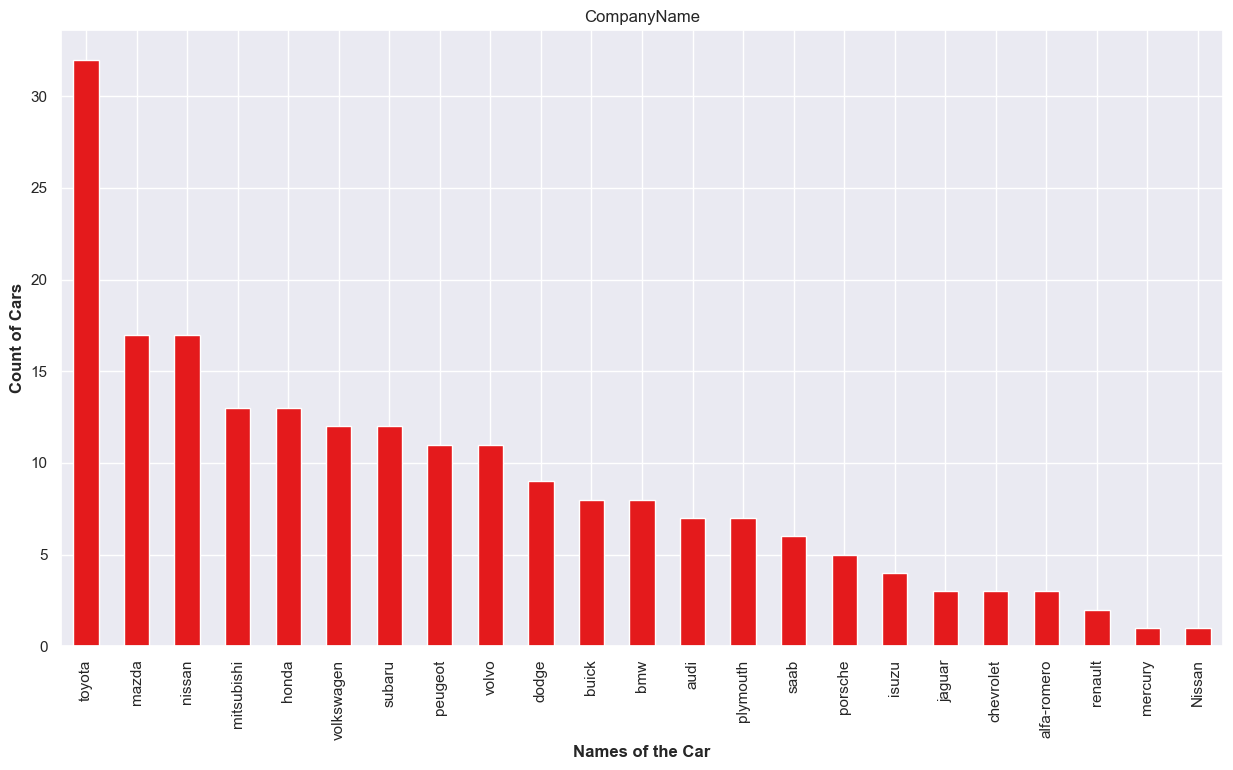

In [58]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=car_pred['CompanyName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CompanyName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

#### Insights:
- Toyota seems to be the most favoured cars.
- Mercury seems to be the least favoured cars.

#### Visualizing the distribution of car prices

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

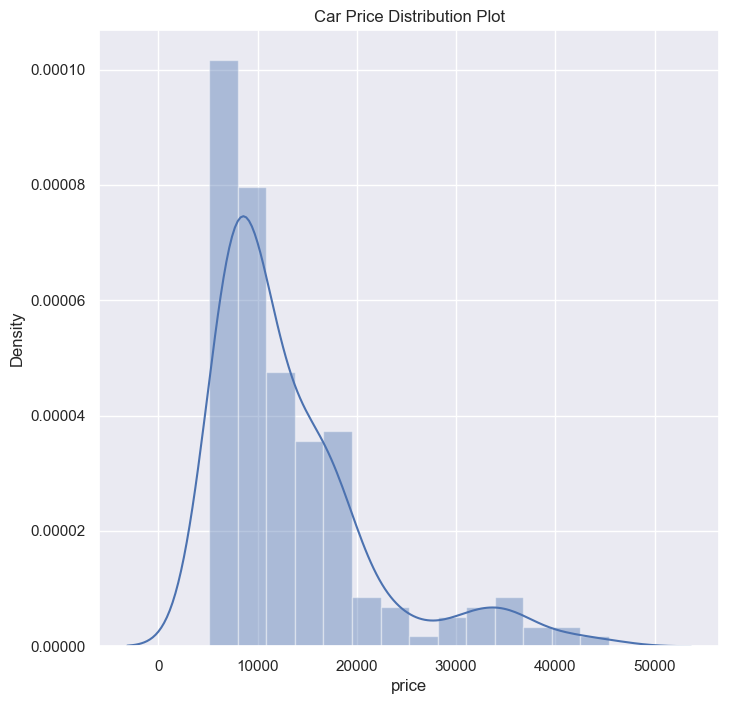

In [59]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(car_pred['price'])

- The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.


#### Visualising Numeric Variables

Pairplot of all the numeric variables

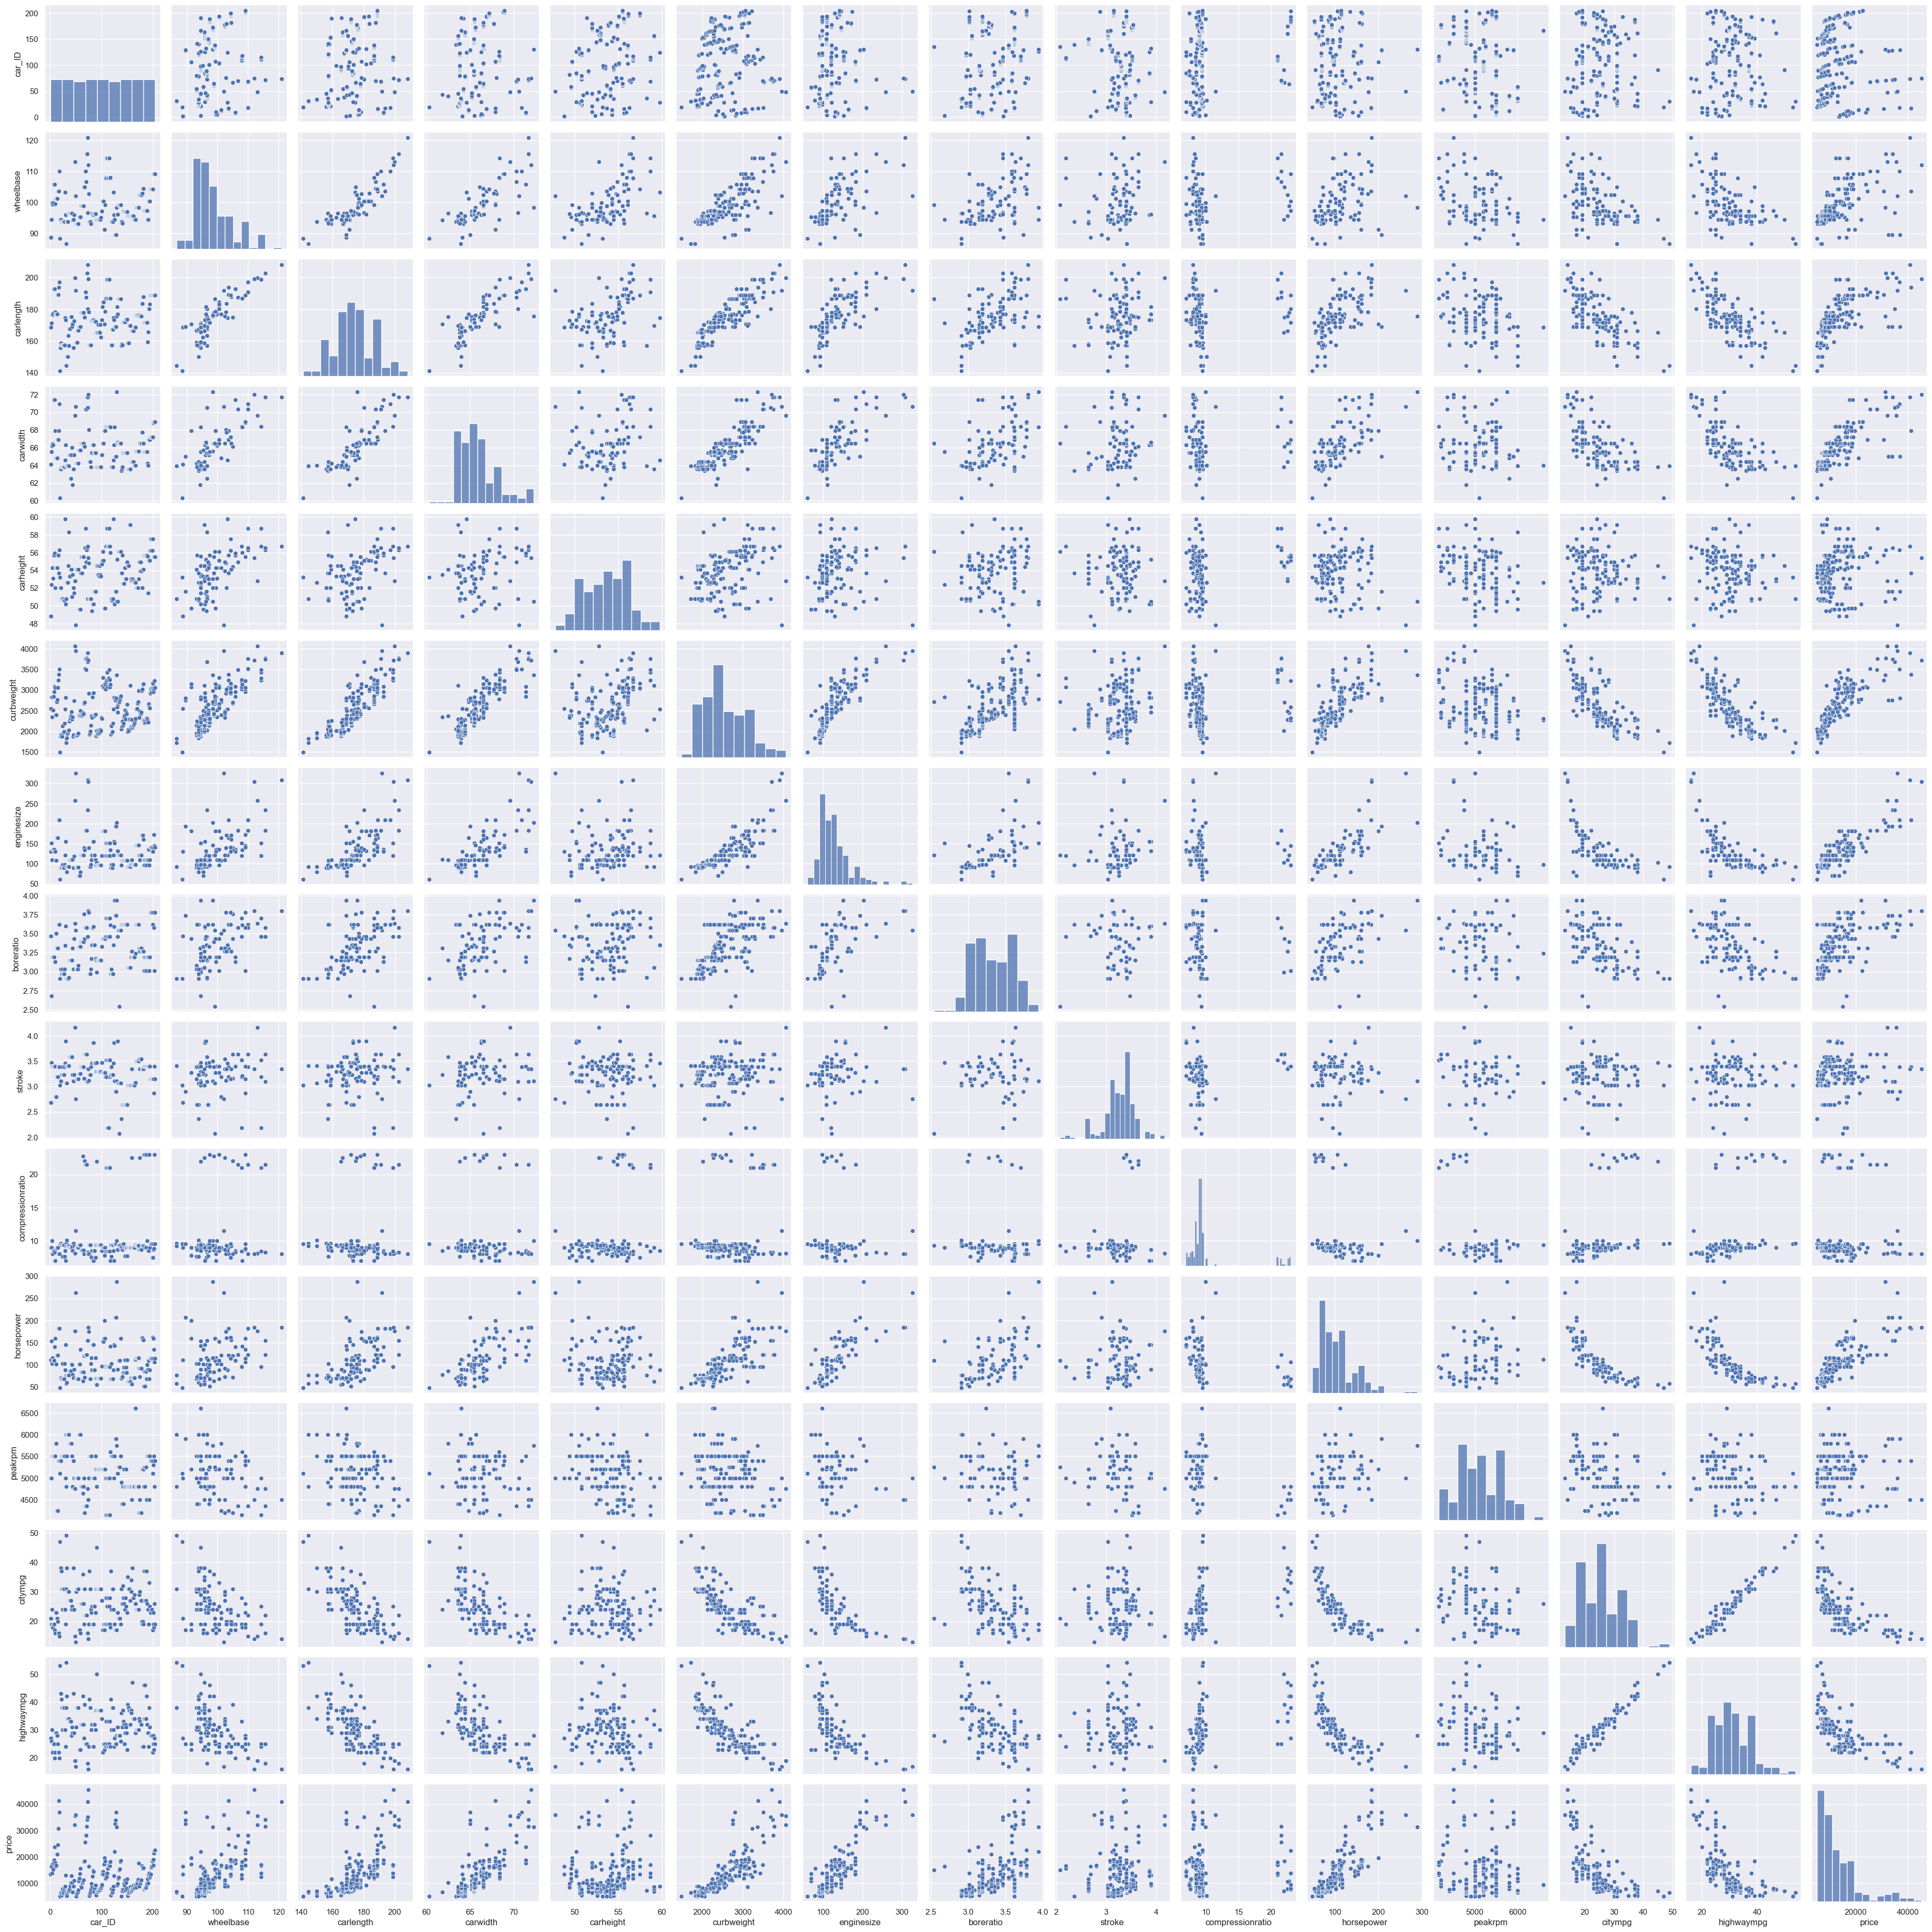

In [60]:
ax = sns.pairplot(car_pred[num_col])

#### Insights:
- `carwidth` , `carlength`, `curbweight` ,`enginesize` ,`horsepower`seems to have a positive correlation with price.
- `carheight` doesn't show any significant trend with price.
- `citympg` , `highwaympg` - seem to have a significant negative correlation with price.

#### Visualising few more Categorical Variables

Boxplot of all the categorical variables

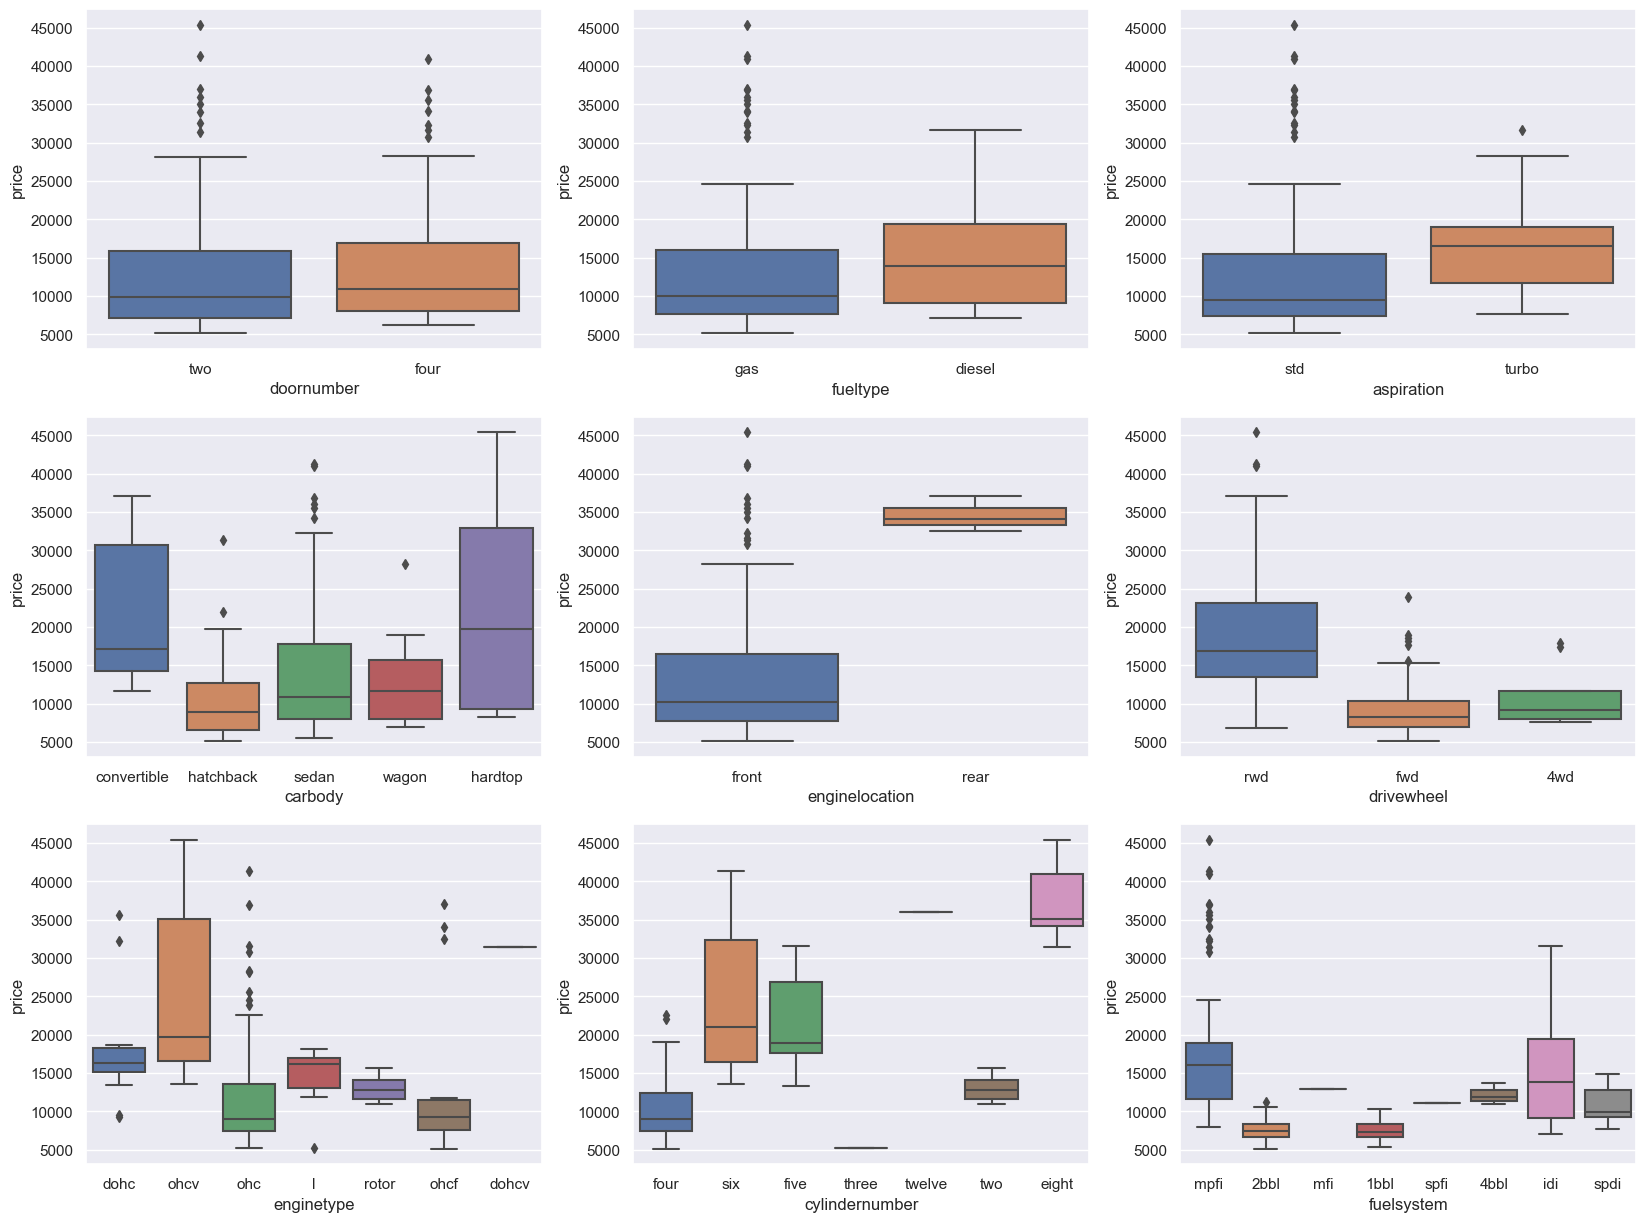

In [62]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = car_pred)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_pred)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_pred)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_pred)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_pred)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pred)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pred)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_pred)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pred)
plt.show()

#### Insights
- The cars with `fueltype` as `diesel` are comparatively expensive than the cars with `fueltype` as `gas`.
- All the types of carbody is relatively cheaper as compared to `convertible` carbody.
- The cars with `rear enginelocation` are way expensive than cars with `front enginelocation`.
- The price of car is directly proportional to `no. of cylinders` in most cases.
- Enginetype `ohcv` comes into higher price range cars.
- `DoorNumber` isn't affecting the price much.
- HigerEnd cars seems to have `rwd` drivewheel

#### Insights:
- The number of cylinders used in most cars is `four`.
- Number of `Gas` fueled cars are way more than `diesel` fueled cars.
- `Sedan` is the most prefered car type.

#### Relationship between `fuelsystem` vs `price` with hue `fueltype`

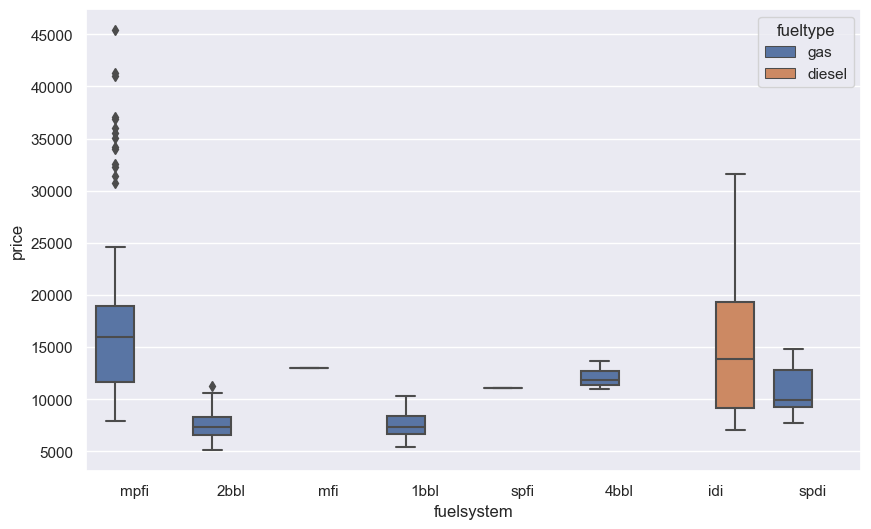

In [63]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = car_pred)
plt.show()

#### Relationship between `carbody` vs `price` with hue `enginelocation`

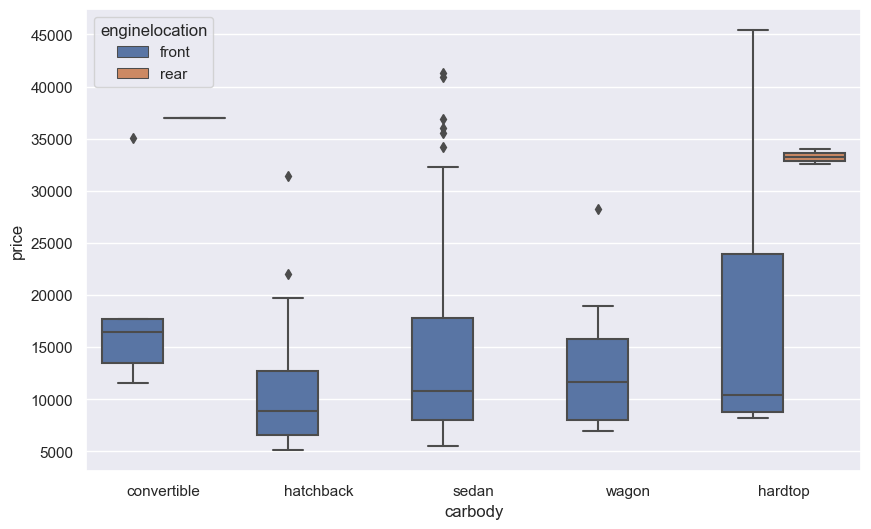

In [64]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = car_pred)
plt.show()

#### Relationship between `cylindernumber` vs `price` with hue `fueltype`

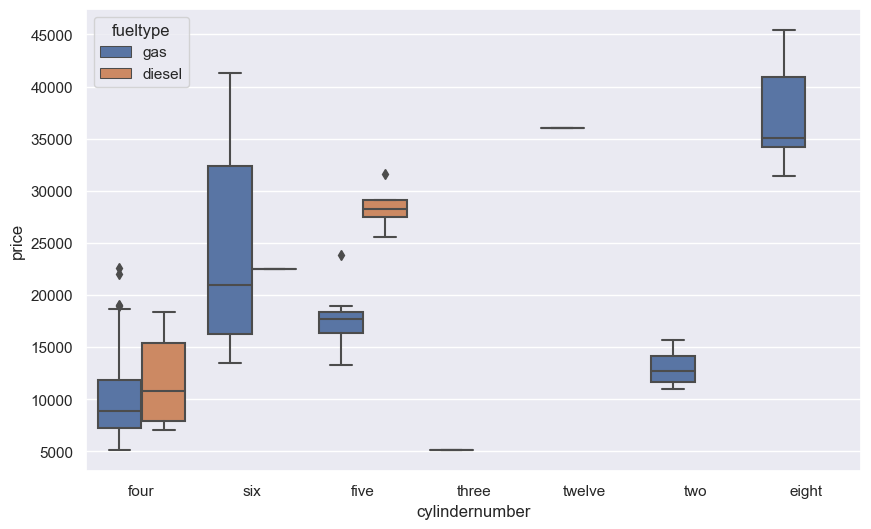

In [65]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = car_pred)
plt.show()

#### Derived Metrices
- Average Price

<Figure size 2000x600 with 0 Axes>

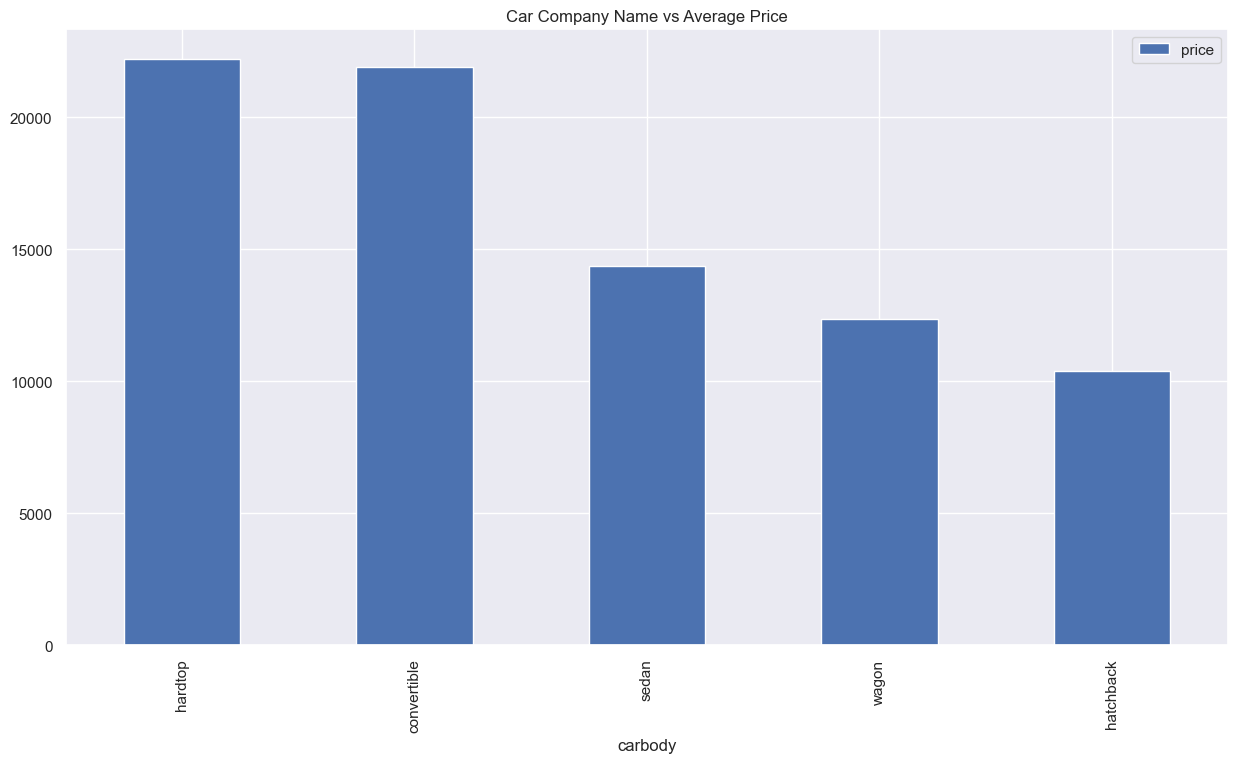

In [66]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(car_pred.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `hardtop` and `convertible` seems to have the highest average price.

#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

In [67]:
sig_col = ['price','CarsRange','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [69]:
car_pred = car_pred[sig_col]

### Data Preparation

#### Dummy Variables

The variable `carbody` has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called `dummy variables`.

In [70]:
sig_cat_col = ['CarsRange','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [71]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(car_pred[sig_cat_col])
dummies.shape

(205, 29)

In [72]:
dummies = pd.get_dummies(car_pred[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [73]:
# Add the results to the original dataframe
car_pred = pd.concat([car_pred, dummies], axis = 1)

In [74]:
# Drop the original cat variables as dummies are already created

car_pred.drop( sig_cat_col, axis = 1, inplace = True)
car_pred.shape

(205, 32)

### Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [75]:
car_pred

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0   13495.0000 88.6000     2548        130        3.4700      111          
1   16500.0000 88.6000     2548        130        3.4700      111          
2   16500.0000 94.5000     2823        152        2.6800      154          
3   13950.0000 99.8000     2337        109        3.1900      102          
4   17450.0000 99.4000     2824        136        3.1900      115          
..         ...     ...      ...        ...           ...      ...          
200 16845.0000 109.1000    2952        141        3.7800      114          
201 19045.0000 109.1000    3049        141        3.7800      160          
202 21485.0000 109.1000    3012        173        3.5800      134          
203 22470.0000 109.1000    3217        145        3.0100      106          
204 22625.0000 109.1000    3062        141        3.7800      114          

     citympg  highwaympg  carlength  carwidth  CarsRange_Medium  \
0    21       27         168.8000   64.1000    1                  
1    21       27         168.8000   64.1000    1                  
2    19       26         171.2000   65.5000    1                  
3    24       30         176.6000   66.2000    1                  
4    18       22         176.6000   66.4000    1                  
..   ..       ..              ...       ...   ..                  
200  23       28         188.8000   68.9000    1                  
201  19       25         188.8000   68.8000    1                  
202  18       23         188.8000   68.9000    1                  
203  26       27         188.8000   68.9000    1                  
204  19       25         188.8000   68.9000    1                  

     CarsRange_Highend  fueltype_gas  aspiration_turbo  carbody_hardtop  \
0    0                  1             0                 0                 
1    0                  1             0                 0                 
2    0                  1             0                 0                 
3    0                  1             0                 0                 
4    0                  1             0                 0                 
..  ..                 ..            ..                ..                 
200  0                  1             0                 0                 
201  0                  1             1                 0                 
202  0                  1             0                 0                 
203  0                  0             1                 0                 
204  0                  1             1                 0                 

     carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
0    0                  0              0              0                
1    0                  0              0              0                
2    1                  0              0              0                
3    0                  1              0              1                
4    0                  1              0              0                
..  ..                 ..             ..             ..                
200  0                  1              0              0                
201  0                  1              0              0                
202  0                  1              0              0                
203  0                  1              0              0                
204  0                  1              0              0                

     drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0    1               0                 0             0                
1    1               0                 0             0                
2    1               0                 0             0                
3    0               0                 0             1                
4    0               0                 0             1                
..  ..              ..                ..            ..                
200  1               0      

In [76]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(car_pred, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122 7609.0000  93.7000     2191        98         2.9700      68           
125 22018.0000 94.5000     2778        151        3.9400      143          
166 9538.0000  94.5000     2300        98         3.2400      112          
1   16500.0000 88.6000     2548        130        3.4700      111          
199 18950.0000 104.3000    3157        130        3.6200      162          

     citympg  highwaympg  carlength  carwidth  CarsRange_Medium  \
122  31       38         167.3000   63.8000    0                  
125  19       27         168.9000   68.3000    0                  
166  26       29         168.7000   64.0000    0                  
1    21       27         168.8000   64.1000    1                  
199  17       22         188.8000   67.2000    1                  

     CarsRange_Highend  fueltype_gas  aspiration_turbo  carbody_hardtop  \
122  0                  1             0                 0                 
125  1                  1             0                 0                 
166  0                  1             0                 0                 
1    0                  1             0                 0                 
199  0                  1             1                 0                 

     carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
122  0                  1              0              1                
125  1                  0              0              0                
166  1                  0              0              0                
1    0                  0              0              0                
199  0                  0              1              0                

     drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  \
122  0               0                 0             1                
125  1               0                 0             1                
166  1               0                 0             0                
1    1               0                 0             0                
199  1               0                 0             1                

     enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
122  0                0                0                 0                     
125  0                0                0                 0                     
166  0                0                0                 0                     
1    0                0                0                 0                     
199  0                0                0                 0                     

     cylindernumber_four  cylindernumber_six  cylindernumber_three  \
122  1                    0                   0                      
125  1                    0                   0                      
166  1                    0                   0                      
1    1                    0                   0                      
199  1                    0                   0                      

     cylindernumber_twelve  cylindernumber_two  
122  0                      0                   
125  0                      0                   
166  0                      0                   
1    0                      0                   
199  0                      0

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [78]:
scaler = preprocessing.StandardScaler()

In [79]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [80]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [81]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122 -0.7002 -0.8118    -0.6421     -0.6602     -1.2973    -0.8729       
125 1.1519  -0.6772    0.4394      0.6378      2.4323     1.0218        
166 -0.4522 -0.6772    -0.4413     -0.6602     -0.2592    0.2387        
1   0.4426  -1.6703    0.0156      0.1235      0.6251     0.2134        
199 0.7576  0.9724     1.1377      0.1235      1.2019     1.5018        

     citympg  highwaympg  carlength  carwidth  CarsRange_Medium  \
122 0.8398   1.0254      -0.4872    -0.9245    0                  
125 -0.9570  -0.5575     -0.3598    1.1150     0                  
166 0.0911   -0.2697     -0.3757    -0.8339    0                  
1   -0.6576  -0.5575     -0.3678    -0.7885    1                  
199 -1.2565  -1.2770     1.2254     0.6164     1                  

     CarsRange_Highend  fueltype_gas  aspiration_turbo  carbody_hardtop  \
122  0                  1             0                 0                 
125  1                  1             0                 0                 
166  0                  1             0                 0                 
1    0                  1             0                 0                 
199  0                  1             1                 0                 

     carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
122  0                  1              0              1                
125  1                  0              0              0                
166  1                  0              0              0                
1    0                  0              0              0                
199  0                  0              1              0                

     drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  \
122  0               0                 0             1                
125  1               0                 0             1                
166  1               0                 0             0                
1    1               0                 0             0                
199  1               0                 0             1                

     enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
122  0                0                0                 0                     
125  0                0                0                 0                     
166  0                0                0                 0                     
1    0                0                0                 0                     
199  0                0                0                 0                     

     cylindernumber_four  cylindernumber_six  cylindernumber_three  \
122  1                    0                   0                      
125  1                    0                   0                      
166  1                    0                   0                      
1    1                    0                   0                      
199  1                    0                   0                      

     cylindernumber_twelve  cylindernumber_two  
122  0                      0                   
125  0                      0                   
166  0                      0                   
1    0                      0                   
199  0                      0

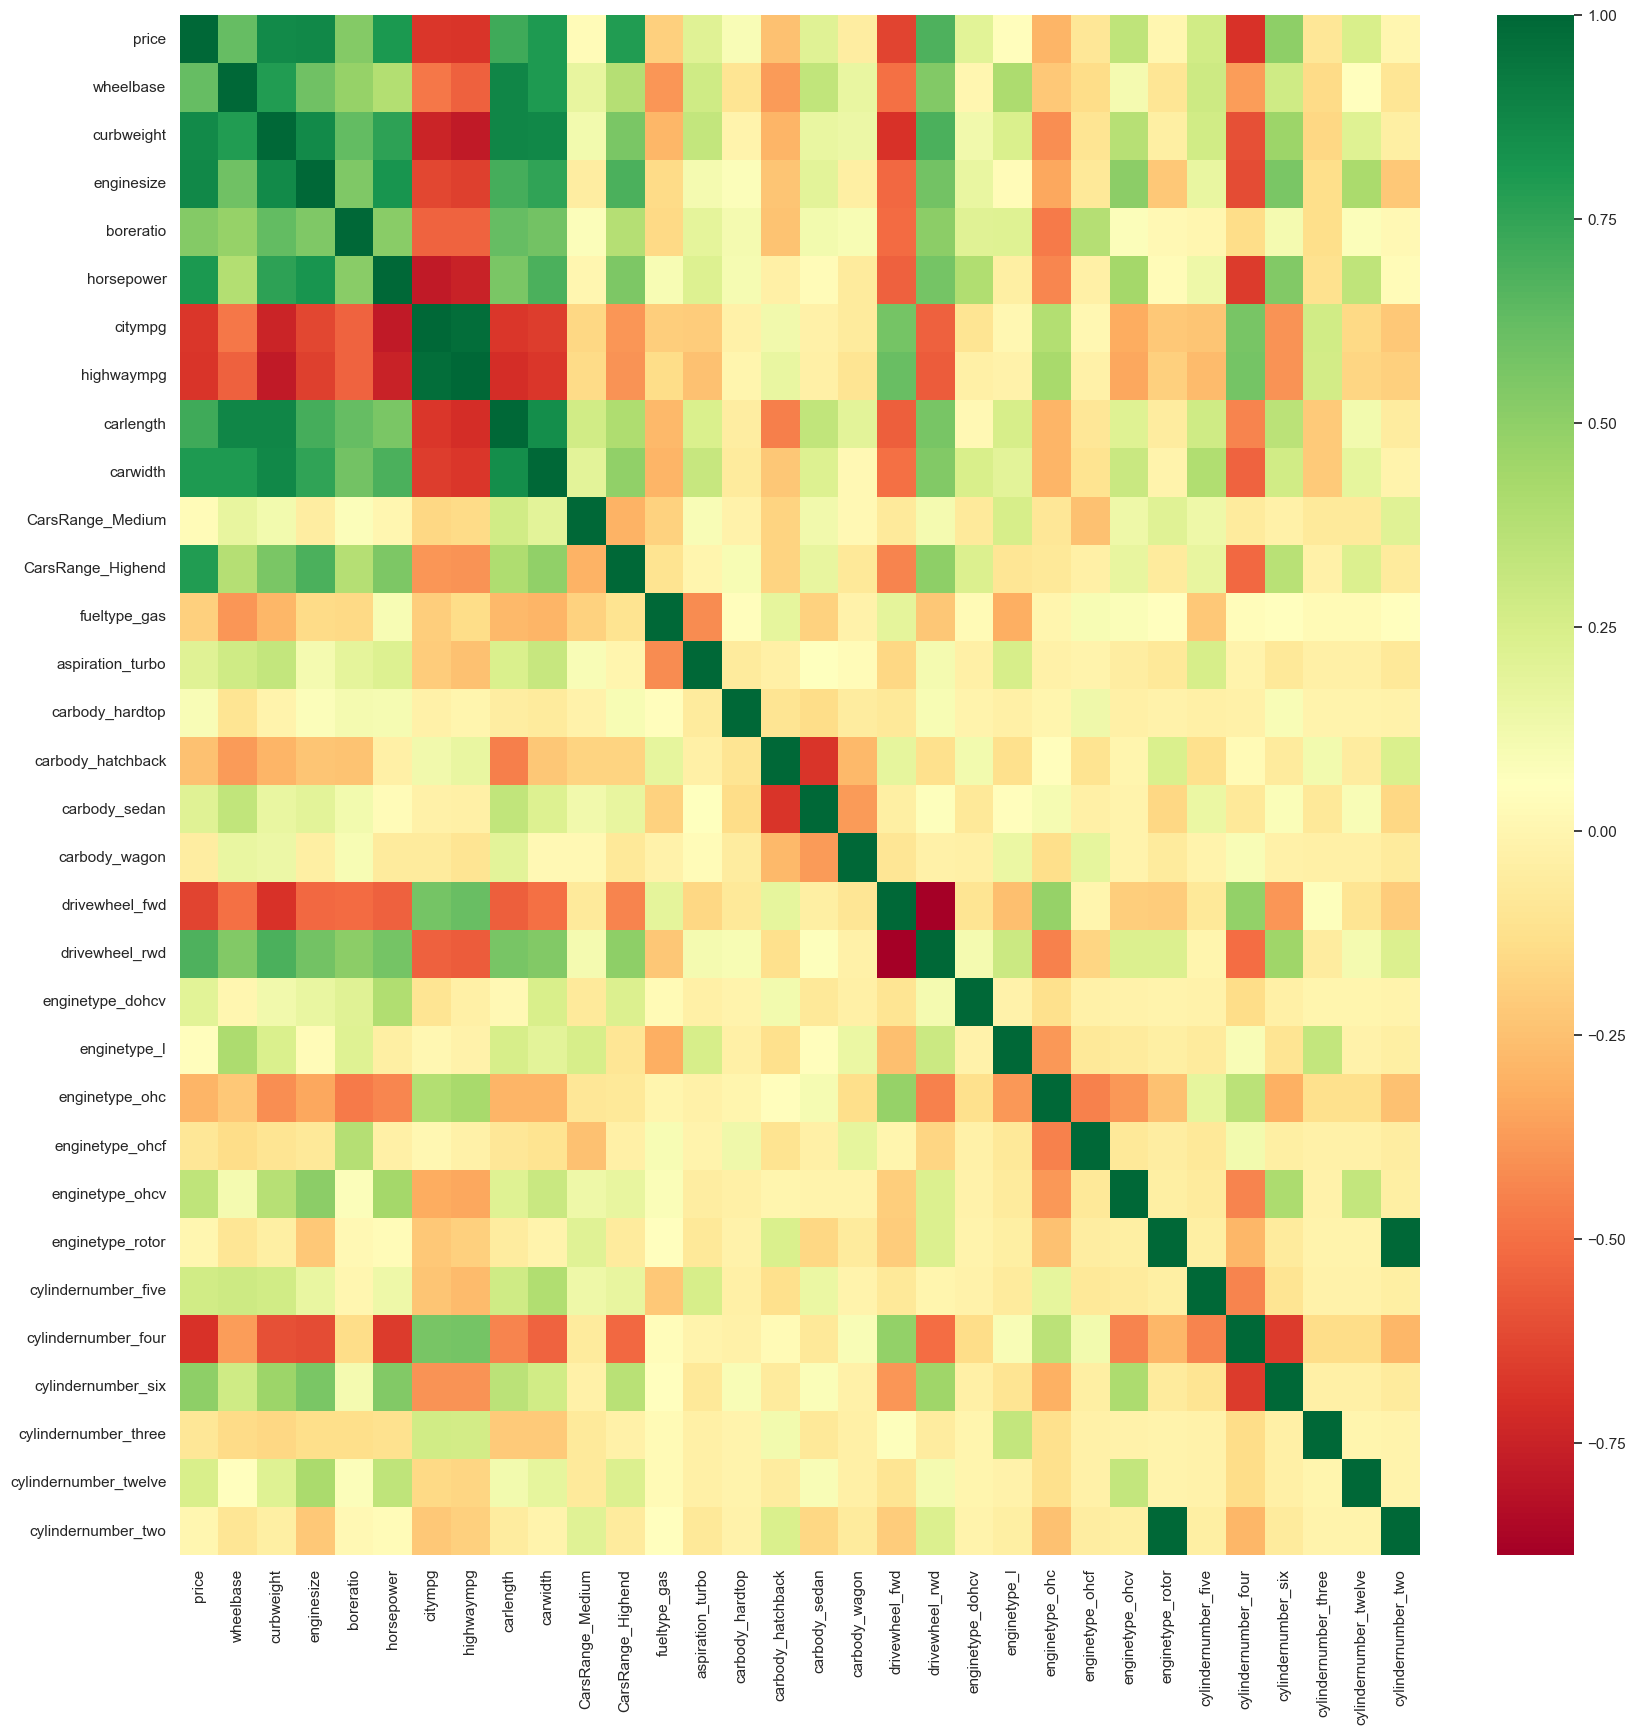

In [82]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

### Dividing into X and Y sets for the model building

In [83]:
y_train = df_train.pop('price')
X_train = df_train

### Building a Linear Model 

In [87]:
X_train_1 = X_train['horsepower']

In [88]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [89]:
# Check parameters created

lr_1.params

const        0.0000
horsepower   0.8062
dtype: float64

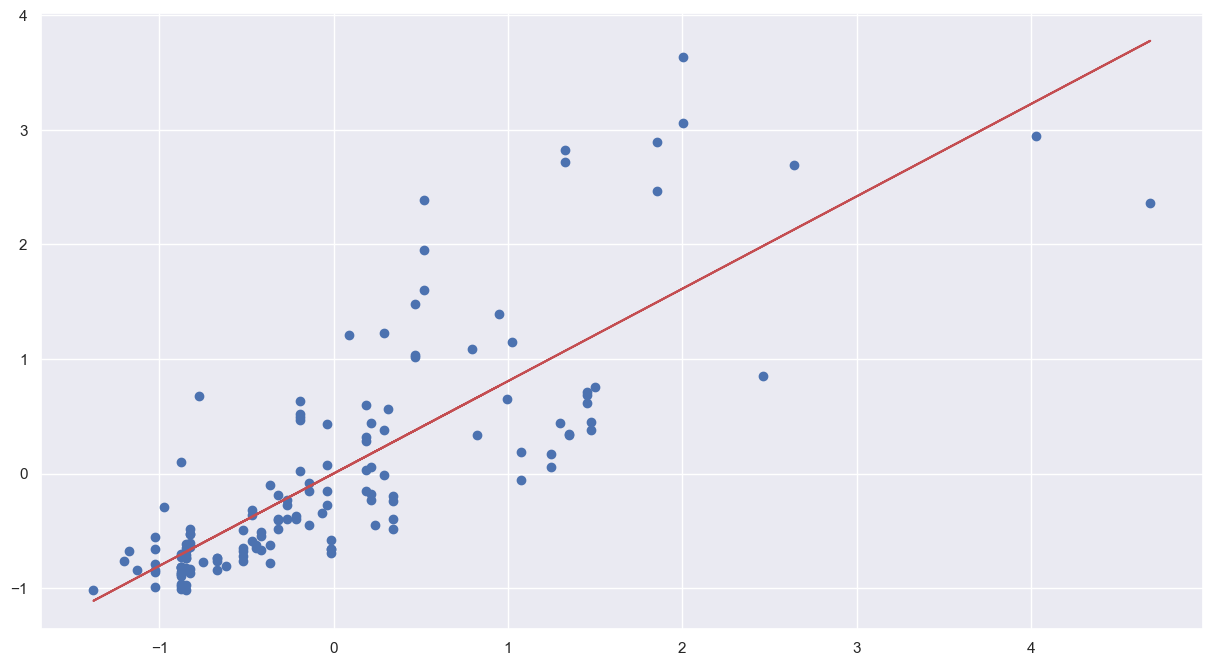

In [90]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [91]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           6.04e-34
Time:                        23:03:17   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e-16      0.050   3.06e-15      1.0

### Adding another variable

The R-squared value obtained is `0.65`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. `curbweight`.

In [92]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [93]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [94]:
lr_2.params

const        0.0000
horsepower   0.3581
curbweight   0.5898
dtype: float64

In [95]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           3.34e-49
Time:                        23:03:34   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e-16      0.038   4.01e-15      1.0

* The R-squared incresed from 0.650 to 0.797 

### Adding another variable

The R-squared value obtained is `0.797`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `enginesize`.

In [96]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [97]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [98]:
lr_3.params

const        0.0000
horsepower   0.2289
curbweight   0.3938
enginesize   0.3400
dtype: float64

In [99]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.16e-51
Time:                        23:03:51   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.492e-16      0.036   4.13e-15      1.0

We have achieved a R-squared of `0.819` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `price`.

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [100]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('CarsRange_Medium', False, 3),
 ('CarsRange_Highend', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 15),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 13),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 14),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16)]

In [102]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'CarsRange_Highend',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [103]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [104]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           3.41e-68
Time:                        23:04:13   Log-Likelihood:                -6.1478
No. Observations:                 143   AIC:                             44.30
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.70

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)<br>
and we need to drop it

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12  cylindernumber_four   15.9200
6   carbody_sedan         9.7300 
0   curbweight            9.0600 
2   carwidth              6.2400 
5   carbody_hatchback     6.1500 
9   enginetype_ohc        5.9700 
1   horsepower            5.6100 
13  cylindernumber_six    4.7300 
7   carbody_wagon         3.4800 
11  cylindernumber_five   2.8200 
3   CarsRange_Highend     2.1700 
8   enginetype_dohcv      1.8400 
14  cylindernumber_twelve 1.6600 
10  enginetype_ohcv       1.6300 
4   carbody_hardtop       1.4500

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

*Dropping `cylindernumber_twelve` beacuse its `p-value` is `0.393` and we want p-value less than 0.05 and hence rebuilding the model*

In [106]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.16e-69
Time:                        23:05:14   Log-Likelihood:                -6.5605
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7124    

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12  cylindernumber_four 15.2700
0   curbweight          9.0600 
6   carbody_sedan       9.0500 
2   carwidth            6.1500 
5   carbody_hatchback   5.9500 
9   enginetype_ohc      5.9200 
1   horsepower          4.6900 
13  cylindernumber_six  3.7000 
7   carbody_wagon       3.3100 
11  cylindernumber_five 2.6600 
3   CarsRange_Highend   2.1400 
8   enginetype_dohcv    1.6700 
10  enginetype_ohcv     1.5300 
4   carbody_hardtop     1.4500

*Dropping `cylindernumber_six` beacuse its `p-value` is `0.493` and we want p-value less than 0.05 and hence rebuilding the model*

In [108]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.29e-70
Time:                        23:05:22   Log-Likelihood:                -6.8235
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6736    

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12  cylindernumber_four 8.9900
0   curbweight          8.5300
2   carwidth            5.7200
9   enginetype_ohc      5.6500
6   carbody_sedan       5.2400
1   horsepower          4.5300
5   carbody_hatchback   3.7600
7   carbody_wagon       2.3600
3   CarsRange_Highend   2.1300
11  cylindernumber_five 1.9700
8   enginetype_dohcv    1.6000
10  enginetype_ohcv     1.5200
4   carbody_hardtop     1.2800

*Dropping `carbody_hardtop` beacuse its `p-value` is `0.238` and we want p-value less than 0.05 and hence rebuilding the model*

In [110]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           6.73e-71
Time:                        23:05:25   Log-Likelihood:                -7.5984
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5631    

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   curbweight          8.5100
11  cylindernumber_four 8.0900
2   carwidth            5.6500
8   enginetype_ohc      5.6000
5   carbody_sedan       4.6400
1   horsepower          4.1700
4   carbody_hatchback   3.3100
6   carbody_wagon       2.2200
3   CarsRange_Highend   2.0800
10  cylindernumber_five 1.9300
7   enginetype_dohcv    1.5800
9   enginetype_ohcv     1.5200

*Dropping `enginetype_ohc` beacuse its `p-value` is `0.110` and we want p-value less than 0.05 and hence rebuilding the model*

In [112]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.81e-71
Time:                        23:05:28   Log-Likelihood:                -9.0054
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5665    

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   curbweight          8.2500
10  cylindernumber_four 6.8000
2   carwidth            5.6500
5   carbody_sedan       4.3300
1   horsepower          4.1700
4   carbody_hatchback   3.1000
6   carbody_wagon       2.2000
3   CarsRange_Highend   1.8300
9   cylindernumber_five 1.6300
7   enginetype_dohcv    1.5700
8   enginetype_ohcv     1.5100

*Dropping `cylindernumber_five` beacuse its `p-value` is `0.104` and we want p-value less than 0.05 and hence rebuilding the model*

In [114]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.91e-72
Time:                        23:05:30   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4821    

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  curbweight          8.1000
9  cylindernumber_four 5.7600
2  carwidth            5.0800
1  horsepower          4.1300
5  carbody_sedan       3.5200
4  carbody_hatchback   2.6300
6  carbody_wagon       1.9400
3  CarsRange_Highend   1.8300
7  enginetype_dohcv    1.5400
8  enginetype_ohcv     1.4300

*Dropping `enginetype_ohcv` beacuse its `p-value` is `0.180` and we want p-value less than 0.05 and hence rebuilding the model*

In [116]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           8.26e-73
Time:                        23:05:33   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4472    

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  curbweight          8.1000
8  cylindernumber_four 5.6600
2  carwidth            5.0800
1  horsepower          3.8100
5  carbody_sedan       3.3500
4  carbody_hatchback   2.4700
6  carbody_wagon       1.8900
3  CarsRange_Highend   1.8100
7  enginetype_dohcv    1.4900

*Dropping `curbweight` beacuse its `VIF` is `8.1` and we want VIF less than 5 and hence rebuilding the model*

In [118]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.86e-71
Time:                        23:05:37   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4709    

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7  cylindernumber_four 5.6600
4  carbody_sedan       3.3500
0  horsepower          2.7200
3  carbody_hatchback   2.4000
1  carwidth            2.2200
2  CarsRange_Highend   1.7300
5  carbody_wagon       1.7100
6  enginetype_dohcv    1.2400

*Dropping `cylindernumber_four` beacuse its `VIF` is `5.66` and we want VIF less than 5 and hence rebuilding the model*

In [120]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.70e-70
Time:                        23:05:41   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2440      0.11

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  horsepower        2.4500
1  carwidth          2.1200
2  CarsRange_Highend 1.7000
4  carbody_sedan     1.2200
6  enginetype_dohcv  1.2200
3  carbody_hatchback 1.1000
5  carbody_wagon     1.0200

Lets drop `carbody_sedan` and see if there is any drastic fall in R squared.If not we can drop `carbody sedan`.
Our aim is to explain the maximum variance with minimum variable.

In [122]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.68e-69
Time:                        23:05:47   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0748      0.03

The R squared value just dropped by `0.005`.Hence we can proceed with dropping `carbody_sedan`.

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  horsepower        2.3100
1  carwidth          2.0800
2  CarsRange_Highend 1.4600
5  enginetype_dohcv  1.2200
3  carbody_hatchback 1.1000
4  carbody_wagon     1.0200

*Dropping `carbody_wagon` beacuse its `p-value` is `0.315` and we want p-value less than 0.05 and hence rebuilding the model*

In [124]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.57e-70
Time:                        23:05:52   Log-Likelihood:                -28.931
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0925      0.03

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  horsepower        2.2800
1  carwidth          2.0700
2  CarsRange_Highend 1.4500
4  enginetype_dohcv  1.2200
3  carbody_hatchback 1.1000

Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_rfe10` and `lm_rfe8`.

### Here, we are proposing Business 2 Models which can be used to predict the car prices.

## MODEL I
- With `lm_rfe10` which has basically 5 predictor variables.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [127]:
# Predicting the price of training set.
y_train_price = lm_rfe10.predict(X_train_rfe10c)

Text(0.5, 0, 'Errors')

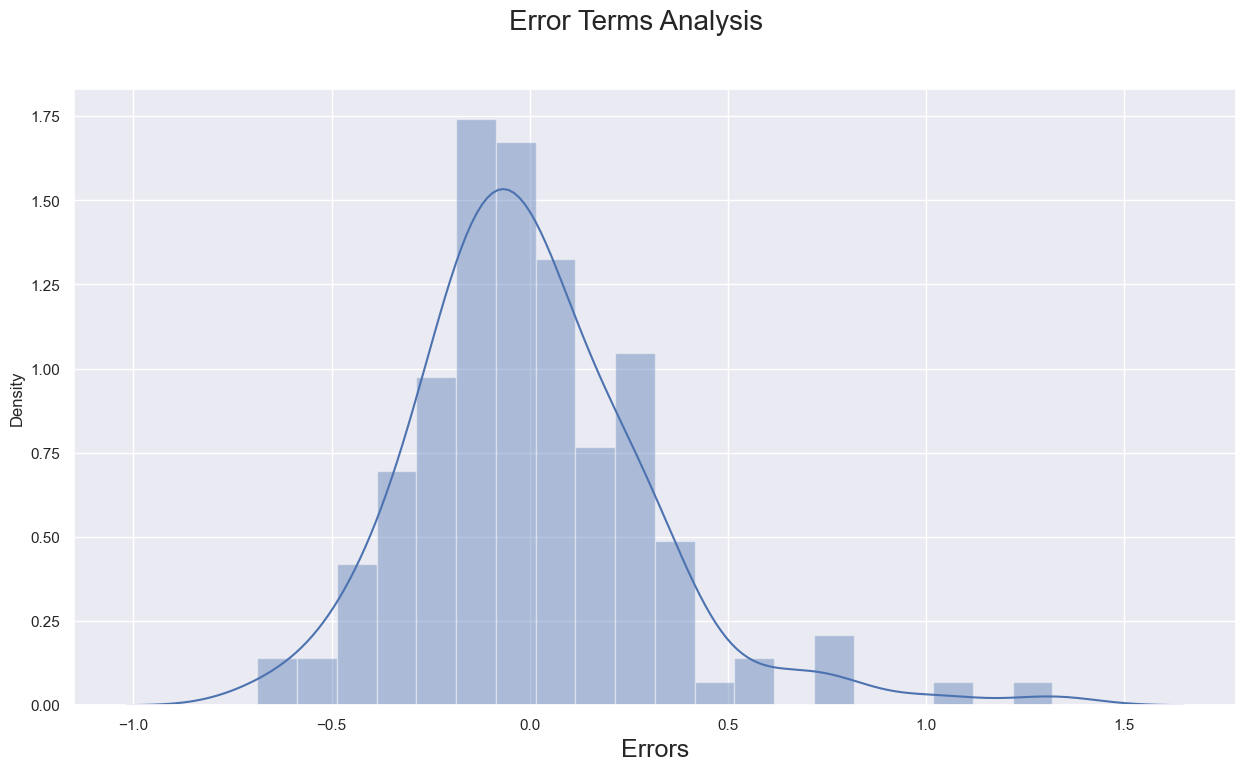

In [128]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [129]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

#### Dividing test set into X_test and y_test

In [130]:
y_test = df_test.pop('price')
X_test = df_test

In [131]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]

In [132]:
# Making predictions using the final model
y_pred = lm_rfe10.predict(X_test_new)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

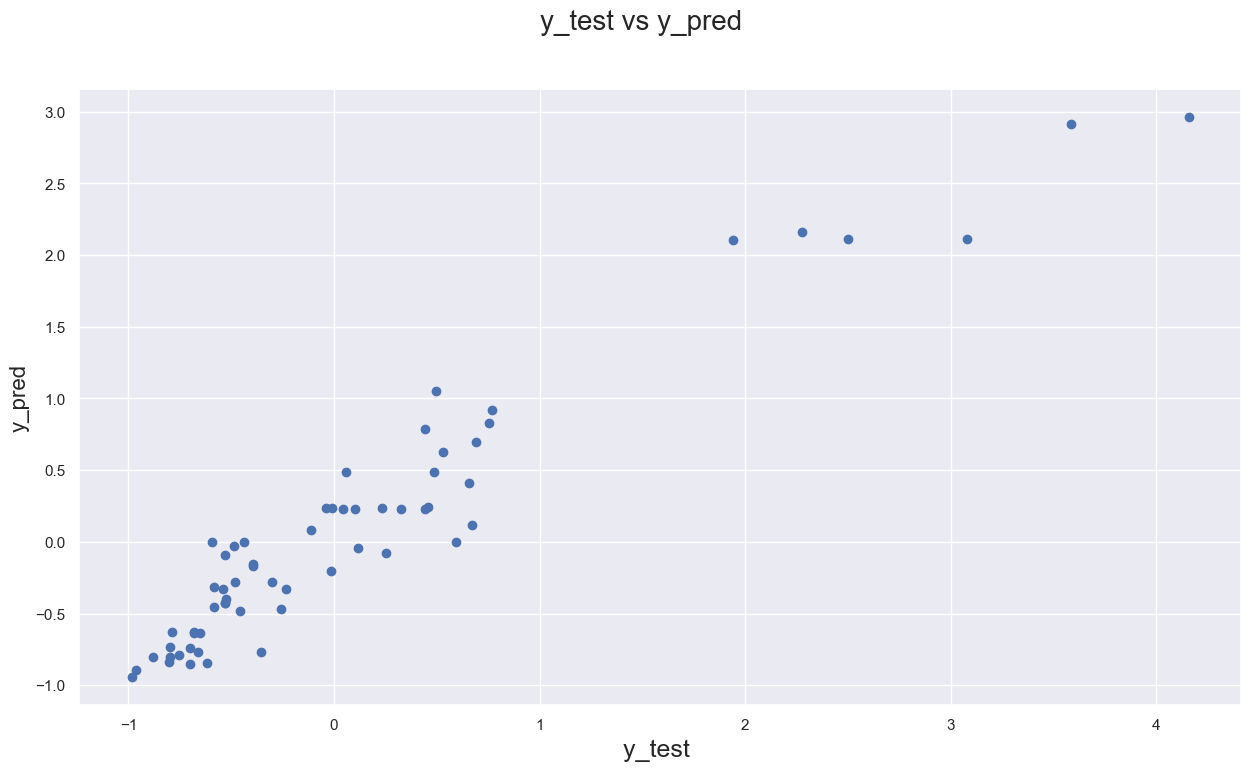

In [133]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### R2 Score

In [134]:
r2_score(y_test, y_pred)

0.9094353587467603

**The R2 score of Training set is 0.912 and Test set is 0.909 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv

#### Equation of Line to predict the Car prices values

$ Carprice = -0.0925 +  0.3847  \times  horsepower  + 0.3381  \times  carwidth +  1.3179 \times Carscategorytopnotchcars  - 0.1565 \times carbodyhatchback  - 1.5033 \times enginetypedohcv $

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.912 and 0.909 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

## MODEL II
- With `lm_rfe8` which has basically 7 predictor variables.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [136]:
# Predicting the price of training set.
y_train_price2 = lm_rfe8.predict(X_train_rfe8c)

Text(0.5, 0, 'Errors')

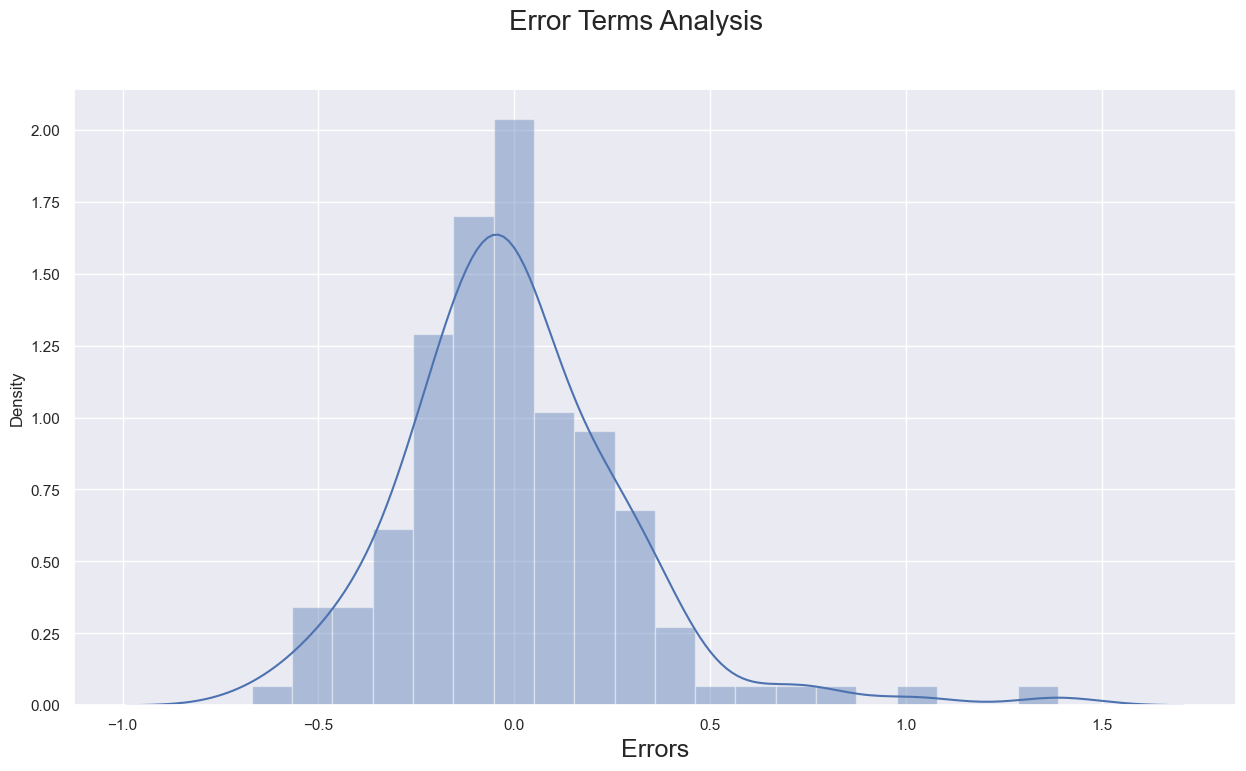

In [137]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [138]:
X_test_2 = X_test_1[X_train_rfe8c.columns]

In [139]:
# Making predictions using the final model
y_pred2 = lm_rfe8.predict(X_test_2)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred2')

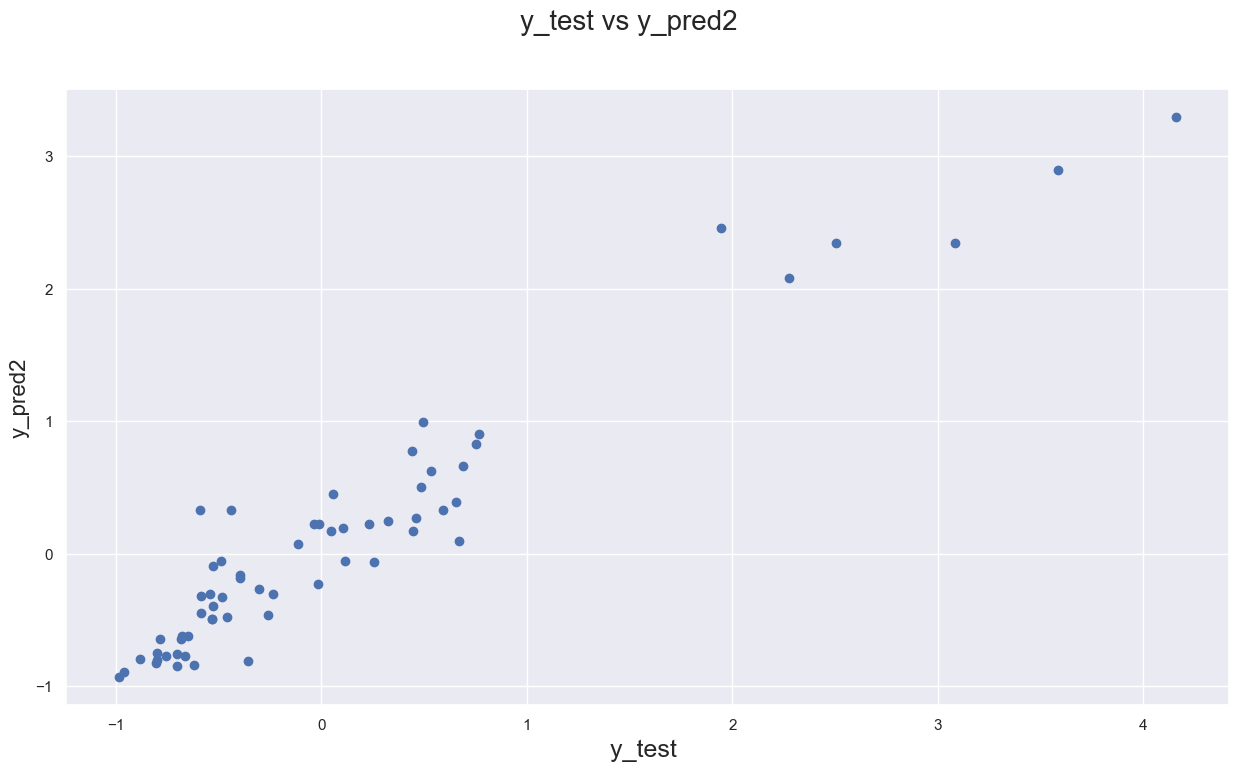

In [140]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)    

### R2 Score

In [141]:
r2_score(y_test, y_pred2)

0.9153852894725919

**The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv
- carbody_sedan                  
- carbody_wagon                  

#### Equation of Line to predict the Car prices values

$ Carprice = 0.2440 +  0.3599  \times  horsepower  + 0.3652  \times  carwidth +  1.2895 \times Carscategorytopnotchcars  - 0.4859 \times carbodyhatchback  - 1.4450 \times enginetypedohcv - 0.3518 \times carbodysedan - 0.4023 \times carbodywagon $

#### Model II Conclusions:
- R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

#### Model II Conclusions:
- R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

### Closing Statement:
- Both the models are good enough to predict the carprices which explains the variance of data upto 90% and the model is significant.

### Conclusion

<b>Car Price Prediction with Machine Learning.<br>

<b>Key-Points</b><br>

💡 First we did the <b>Basic Understanding of Data</b><br>
💡 Then we performed <b>Data Cleaning</b> to make the raw data more useable while analysis.<br>
💡 Then we performed <b>Exploratory Data Analysis</b> to generate insights from the data.<br>
💡 Then we performed <b>Data Preprocessing</b> to make data suitable for model training & testing.<br>
💡 Then we trainined our model using different Machine Learning Algorithms.<br>
💡 In the end we came with <b>90% accuracy, So we can use this model for predicting price of a car in future.<br>
</div>